# Credit Risk Approval

### Context

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings

### Task

Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label. Also, unbalance data problem is a big problem in this task.

### Dataset Info

The dataset split into two csv files. The first one is application_record.csv which contains personal information for each client.



*   ID                  : Client number
*   CODE_GENDER         : Gender
*   FLAG_OWN_CAR        : Is there a car
*   FLAG_OWN_REALTY     : is there a property
*   CNT_CHILDREN        : Number of children
*   AMT_INCOME_TOTAL    : Annual income
*   NAME_INCOME_TYPE    : Income category
*   NAME_EDUCATION_TYPE : Education level
*   NAME_FAMILY_STATUS  : Marital status
*   NAME_HOUSING_TYPE   : Way of living
*   DAYS_BIRTH          : Birthday (Count backwards from current day (0)
*   DAYS_EMPLOYED       : Start date of employment
*   FLAG_MOBIL          : is there a mobile phone
*   FLAG_WORK_PHONE     : is there a work phone
*   FLAG_PHONE          : Is there a phone
*   FLAG_EMAIL          : Is there an email
*   OCCUPATION_TYPE     : Occupation
*   CNT_FAM_MEMBERS     : Family size








The second one is credit_record.csv which contains the credit record for each client for each month they applied for credit



*   ID :Client number
*   MONTHS_BALANCE : The month of the extracted data is the starting point backwards
*   STATUS : 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month


## Import Library

In [1]:
!pip install statsmodels

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import plotly.express as px
import plotly.graph_objects as go
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

from imblearn.over_sampling import SMOTE 

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

In [3]:
# from google.colab import drive
# drive.mount('/content/gdrive')

## Load Dataset

In [4]:
df_cred = pd.read_csv('credit_record.csv')
df_cred.head()
# df_cred = pd.read_csv('/content/gdrive/MyDrive/Dibimbing/data/credit_record.csv')
# df_cred.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
df_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [6]:
df_app = pd.read_csv('application_record.csv')
df_app.head()
# df_app = pd.read_csv('/content/gdrive/MyDrive/Dibimbing/data/application_record.csv')
# df_app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [7]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

## Check missing value

In [8]:
# Check if missing values
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [9]:
missing_values_table(df_app)

Your selected dataframe has 18 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
OCCUPATION_TYPE,134203,30.6


In [10]:
missing_values_table(df_cred)

Your selected dataframe has 3 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


There are 240048 missing values in 'OCCUPATION_TYPE'. It's about 30.6% of the data. For now I'll decide to rename it into 'unknown'

In [11]:
df_app = df_app.replace(np.nan,'unknown')
df_app

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,unknown,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,unknown,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,unknown,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,unknown,2.0


In [12]:
df_app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,unknown,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,unknown,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [13]:
df_app.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


## Feature Engineering

We can calculate the age and employed years based on 'DAYS_BIRTH' and 'DAYS_EMPLOYED'. Just divide those features by 365

In [14]:
### Create a copy of df_app
df_app0 = df_app.copy()
### Create a new feature 'age'
df_app0['Age'] = round(df_app['DAYS_BIRTH']/-365,1)
### Create a new feature 'years_employed'
df_app0['years_employed'] = np.where(df_app['DAYS_EMPLOYED'] >= 0, 0, round(df_app['DAYS_EMPLOYED']/-365,1))

'STATUS' feature is the output that we wanted. According to https://www.listendata.com/2019/09/credit-risk-vintage-analysis.html. If client defaults (60 days or more past due) during the performance window, borrower would be considered as a 'bad' client. here 0 means good client while 1 means bad/defaultclient

In [15]:
df_cred0 = df_cred.copy()
df_cred0['STATUS'] = df_cred['STATUS'].map({"X":0,"C":0, "0":0, "1":1, "2":1, "3":1, "4":1, "5":1})
df_cred0

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,0
...,...,...,...
1048570,5150487,-25,0
1048571,5150487,-26,0
1048572,5150487,-27,0
1048573,5150487,-28,0


## Data Visualization

### Distribution between risky and safe client

We will see the distribution between risky and safe client

In [16]:
### Grouping df_cred by ID
df_group = df_cred0.groupby(['ID'])['MONTHS_BALANCE','STATUS'].max()
df_group

,MONTHS_BALANCE,STATUS
ID,,
5001711,0,0
5001712,0,0
5001713,0,0
5001714,0,0
5001715,0,0
...,...,...
5150482,-11,0
5150483,0,0
5150484,0,0


In [17]:
#### Merging personal information and credit history of client
df = pd.merge(df_app0, df_group, on = 'ID')
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Age,years_employed,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,unknown,2.0,32.9,12.4,0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,unknown,2.0,32.9,12.4,0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,58.8,3.1,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,52.4,8.4,0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,52.4,8.4,-22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Managers,2.0,47.5,6.6,0,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,1,0,1,1,Medicine staff,2.0,33.9,3.6,0,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,1,0,1,1,Medicine staff,2.0,33.9,3.6,0,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Sales staff,2.0,49.2,1.8,0,1


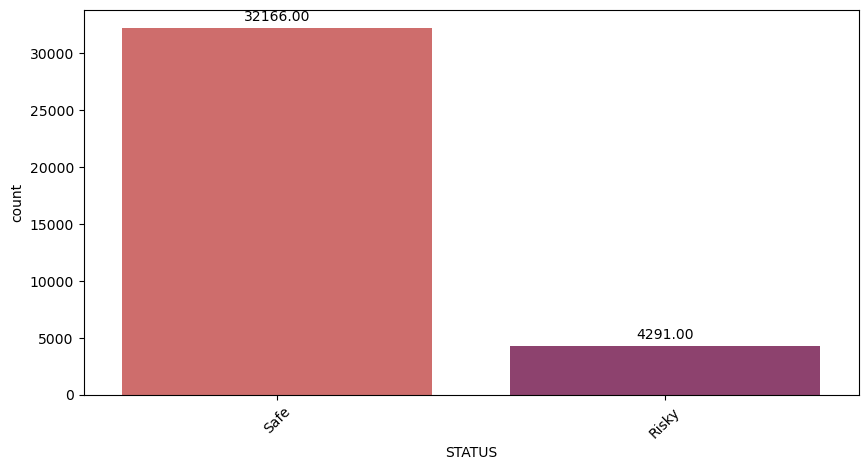

In [18]:
### Create a new dataframe consist of distribution between safe and risky client
df_status = df.groupby(['STATUS']).size().reset_index()
df_status['STATUS'] = df_status['STATUS'].map({0 : 'Safe', 1 : 'Risky'})
df_status = df_status.rename(columns={0 : 'count'})

### Plotting
fig, ax = plt.subplots(figsize=(10,5))
ax=sns.barplot(x='STATUS', y='count', data=df_status, palette='flare')
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

as we can see the output is quite imbalance. Later we need to do imbalance data handling

### Distribution of each categorical variable

Next we will check the distribution of each categorical variable

In [19]:
# Categorical features
cats = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
       'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'
       ]

In [112]:
### Plotting each categorical features
def categorical_distribution(df,col,title):
    fig, ax = plt.subplots(figsize=(10,7))
    ax=sns.countplot(x=col, data=df, palette='flare', order = df[col].value_counts().index)
    for bar in ax.patches:
      ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
    plt.title(title)
    plt.show()

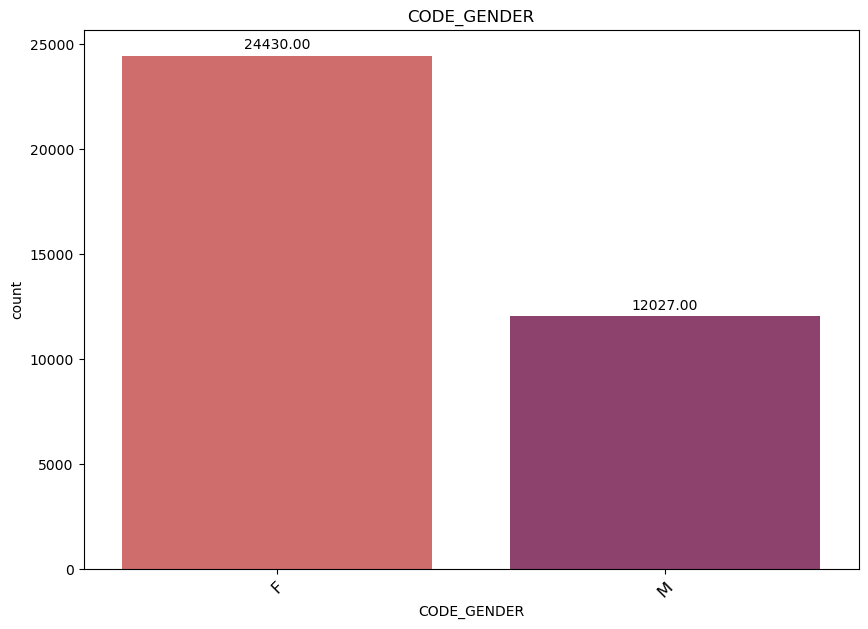

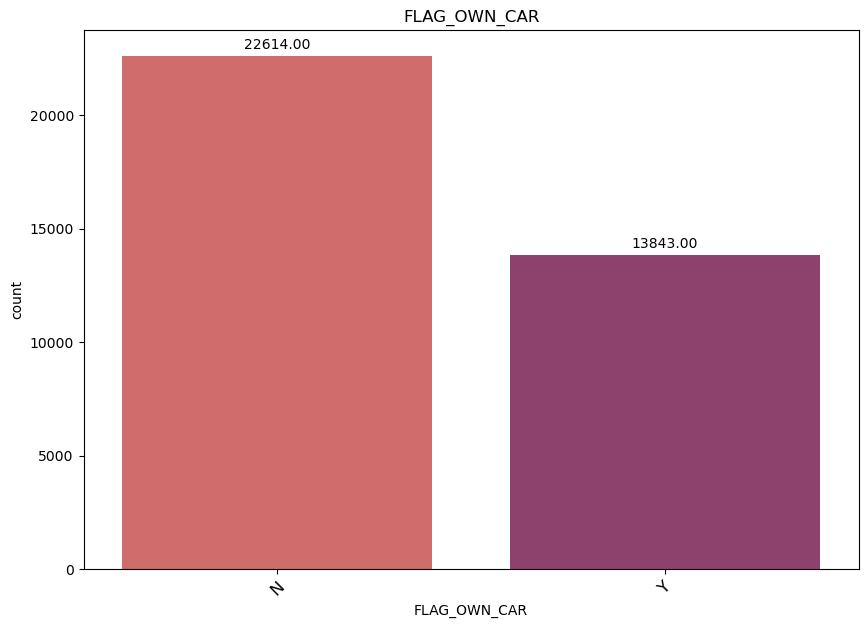

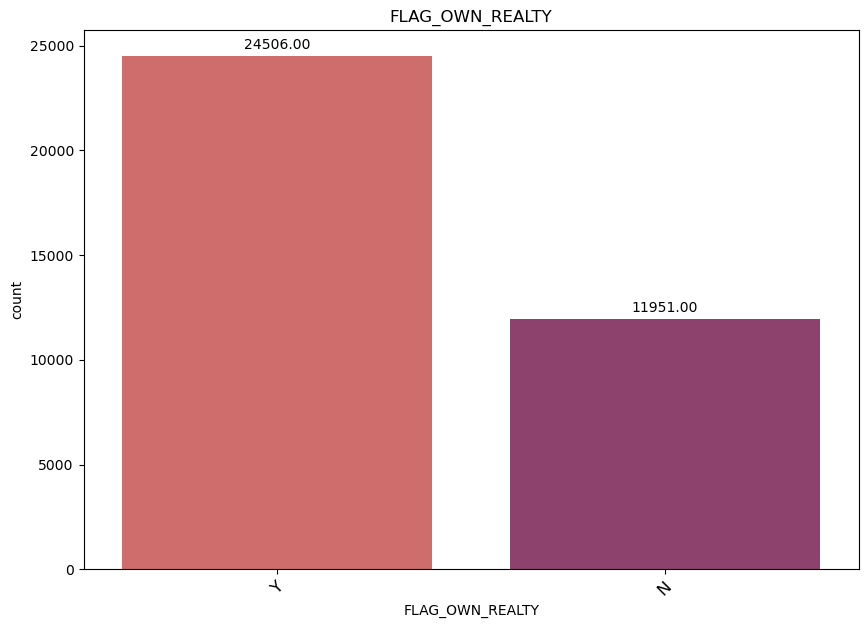

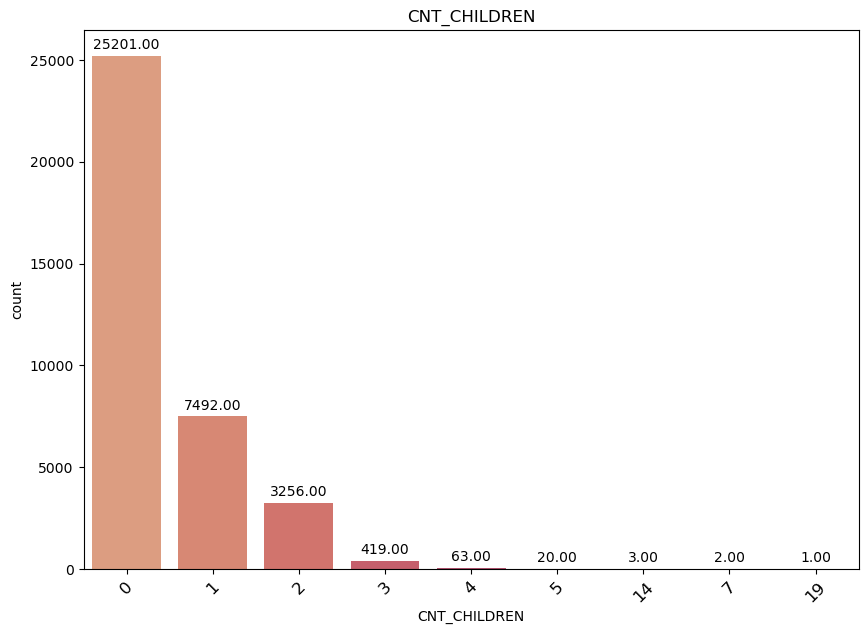

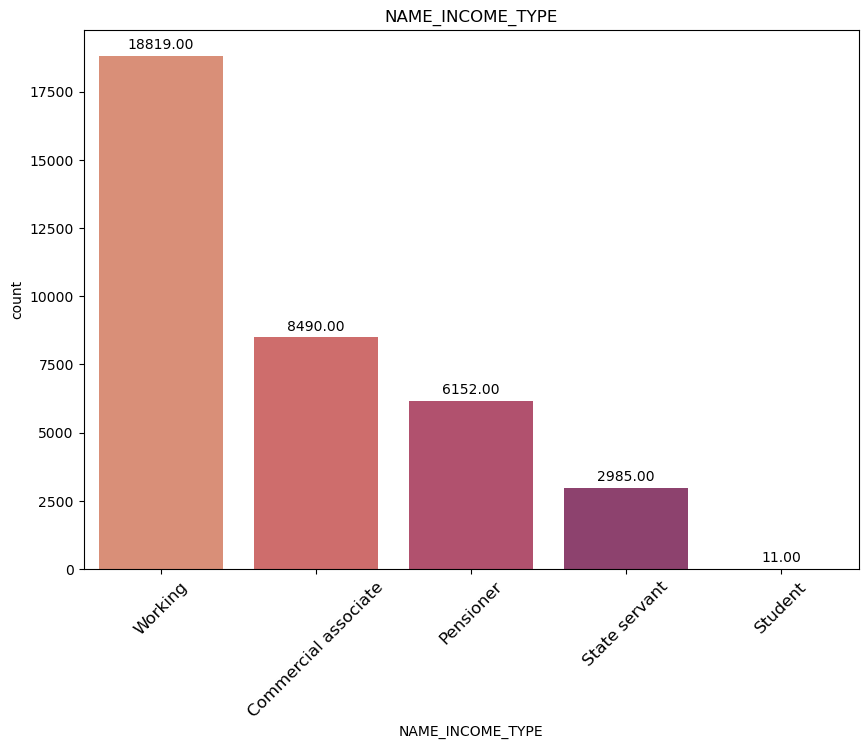

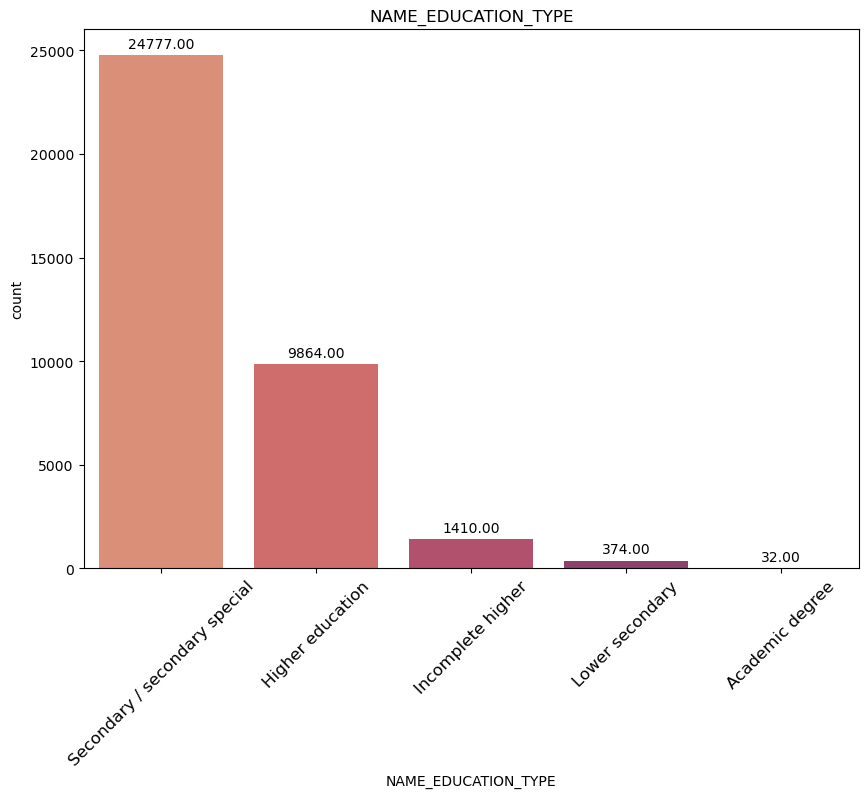

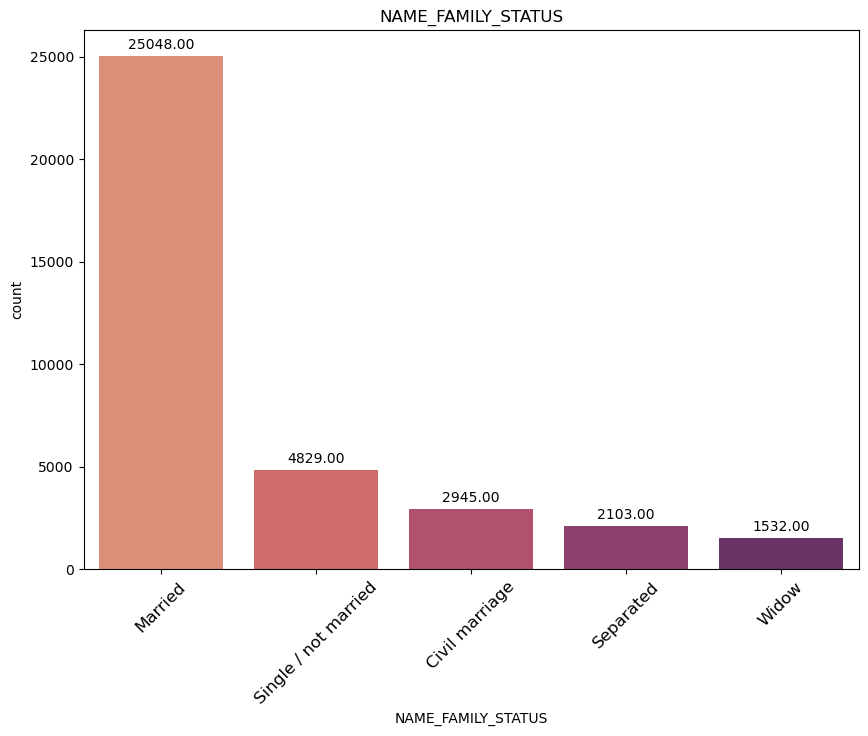

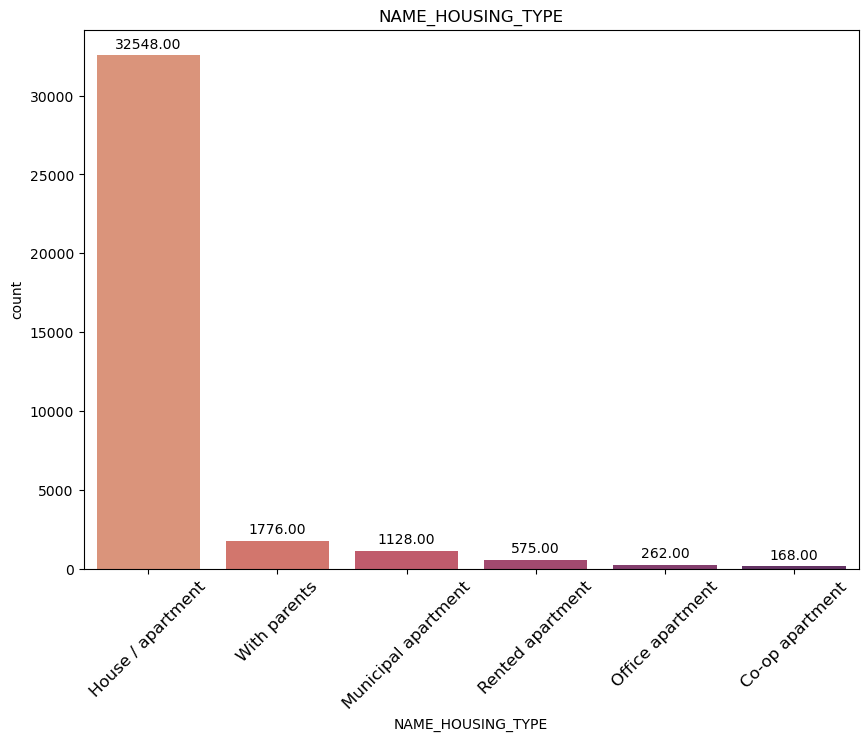

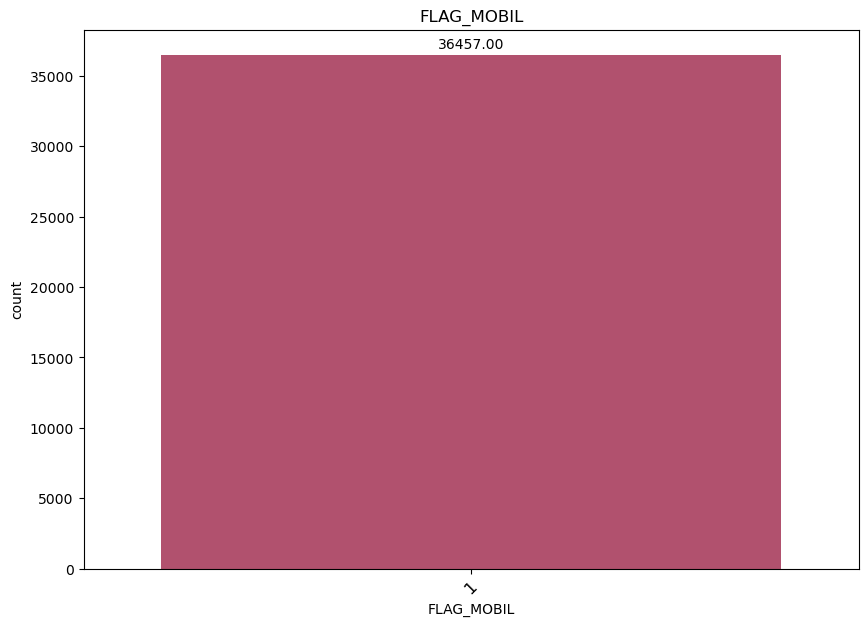

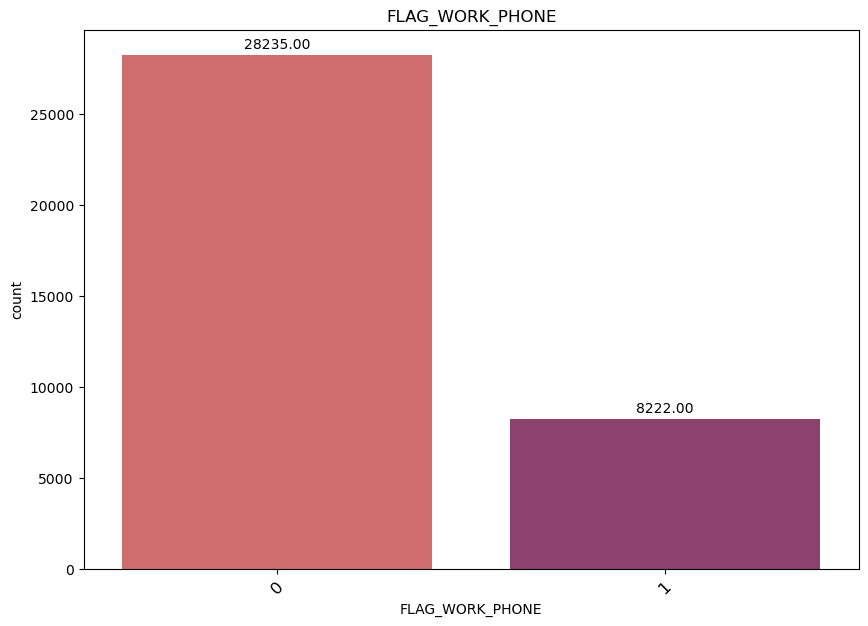

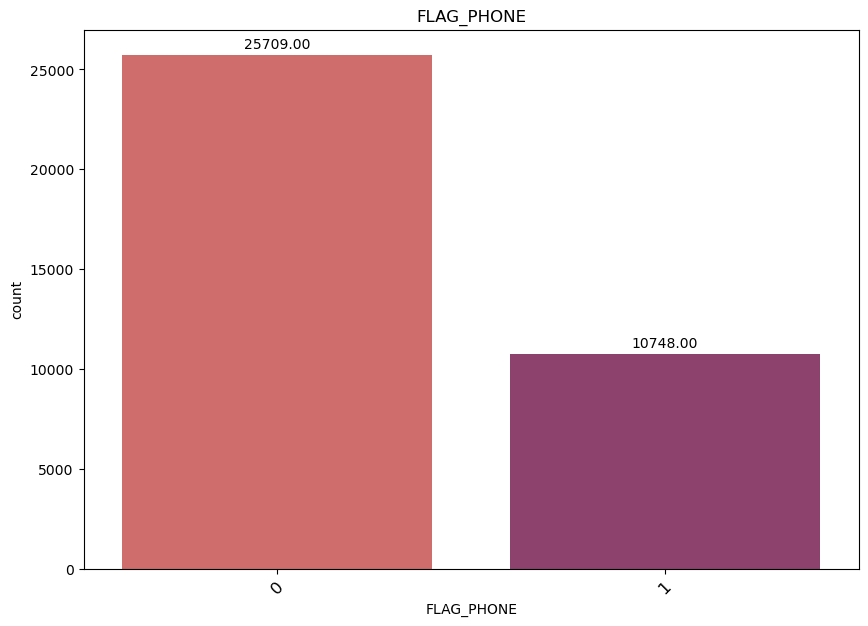

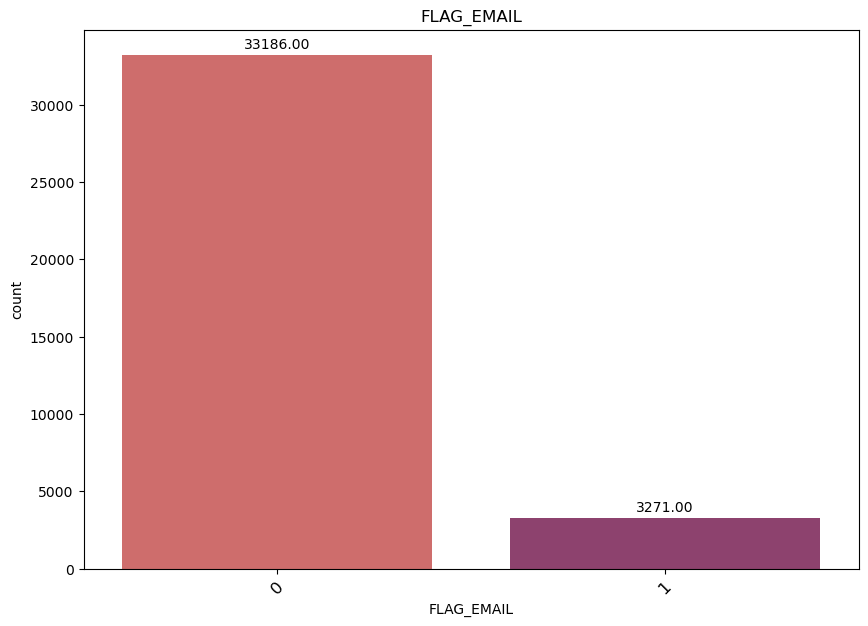

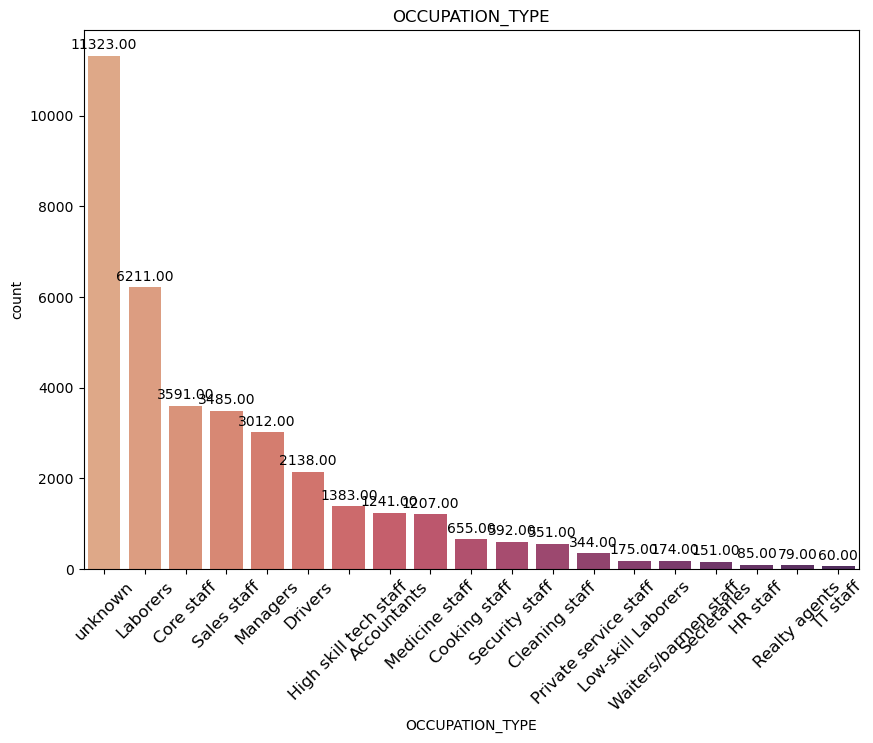

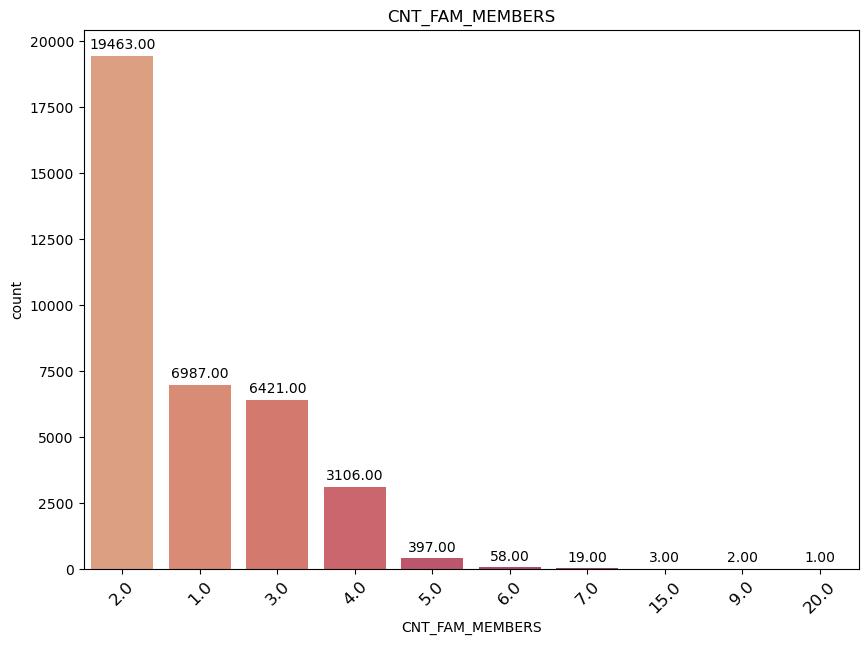

In [113]:
for i in cats:
  categorical_distribution(df,i,i)

There are some interesting facts found after plotting for each categorical features:

1.   Most client don't have any children which is around 63.8% of total client
2.   Most client has income type of working which is around 52% of total client
3.   Most client's education are on Secondary special which is around  70% of total client
4.   Most client has house / apartement and is married.
5.   30% of the client has unknown occupation

Next we will see the percentage of risky client for each features



In [110]:
### Create a function which calculate how much percentage of risky customer
### for each features and then plot it
def percentage_risky(df,col):
  df_risky = df[df['STATUS'] == 1].groupby([col,'STATUS']).size().reset_index()
  df_risky['STATUS'] = df_risky['STATUS'].map({1 : 'Risky'})
  df_risky = df_risky.rename(columns={0 : 'risky'})
  df_risky.reset_index(drop=True, inplace=True)

  df_total = df.groupby([col]).size().reset_index()
  df_total = df_total.rename(columns={0 : 'count'})

  df_join = pd.merge(df_total, df_risky, how='left', on=col)
  
  df_join = df_join.rename(columns={'count' : 'total'})
  df_join['percentage'] = round(df_join['risky']/df_join['total']*100,2)
  df_join = df_join.sort_values(by=['percentage'], ascending = False)

  fig, ax = plt.subplots(figsize=(10,7))
  ax=sns.barplot(x=col, y='percentage', data=df_join, palette='flare')
  for bar in ax.patches:
      ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
  plt.show()

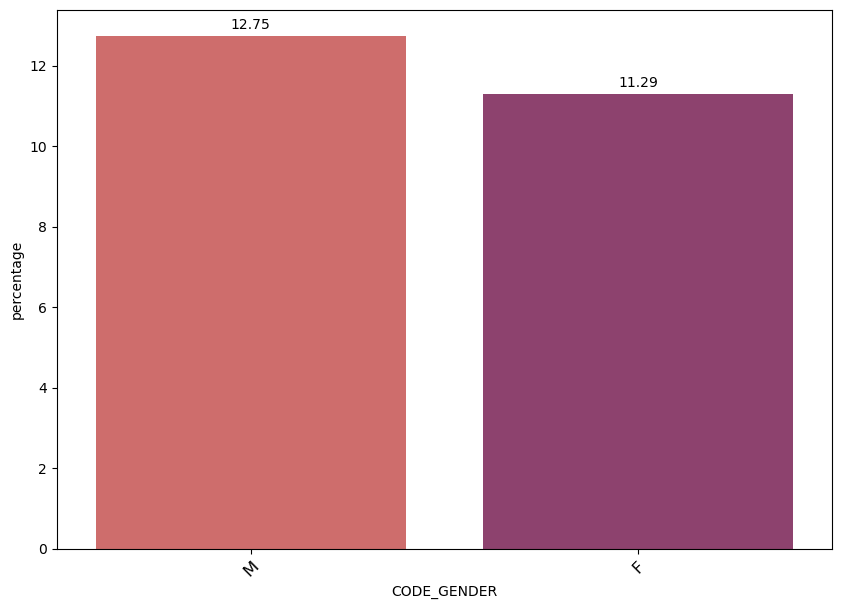

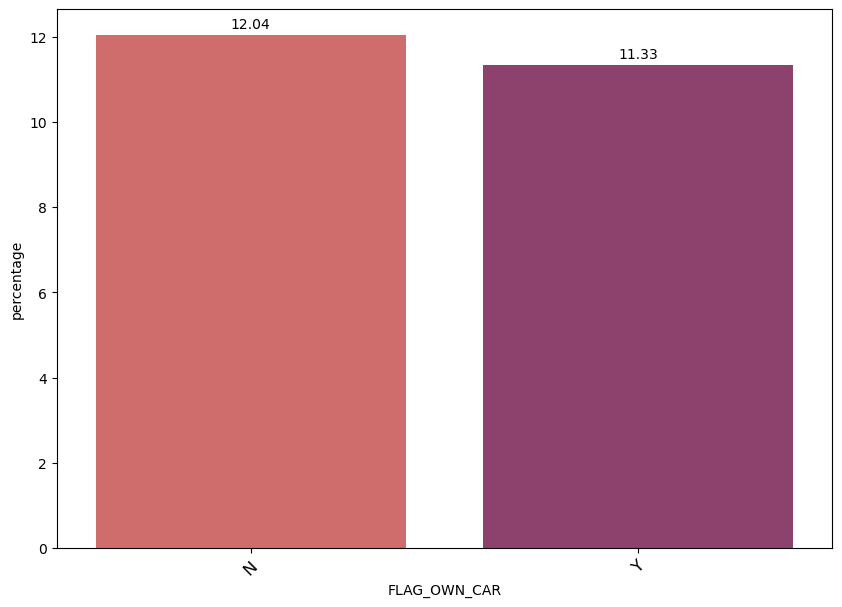

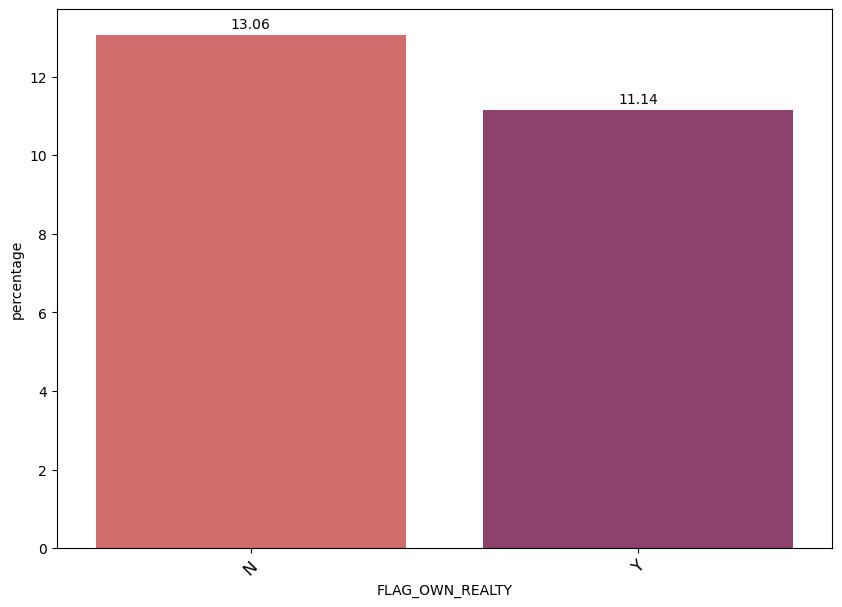

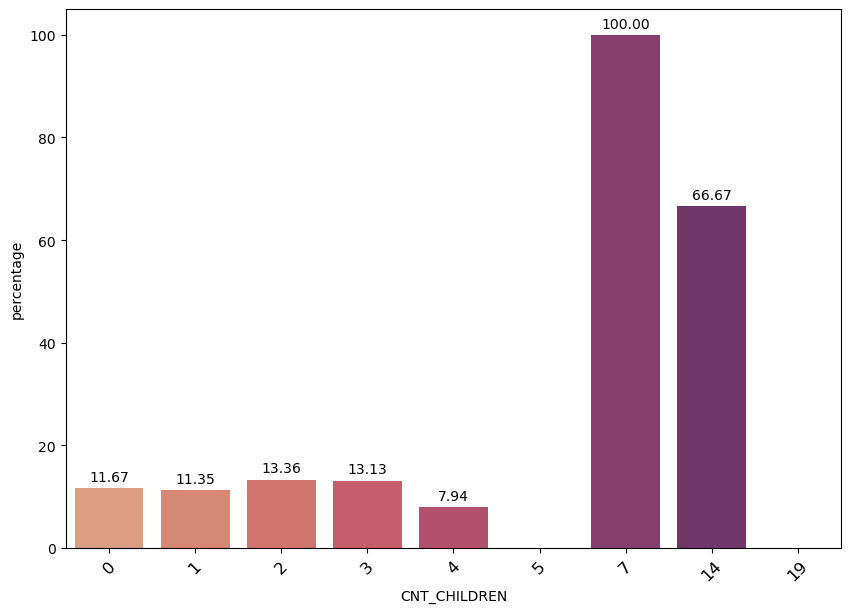

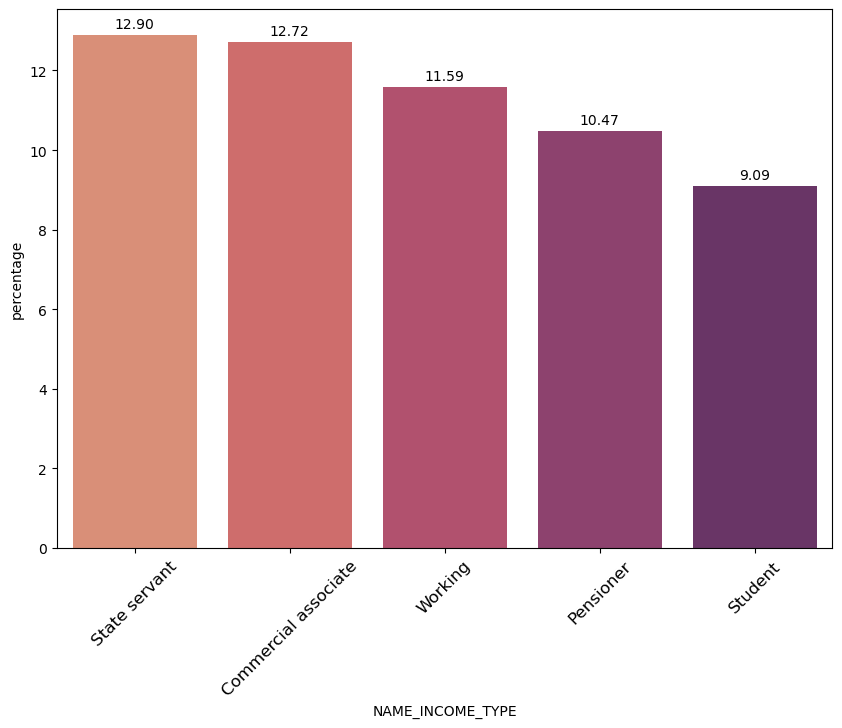

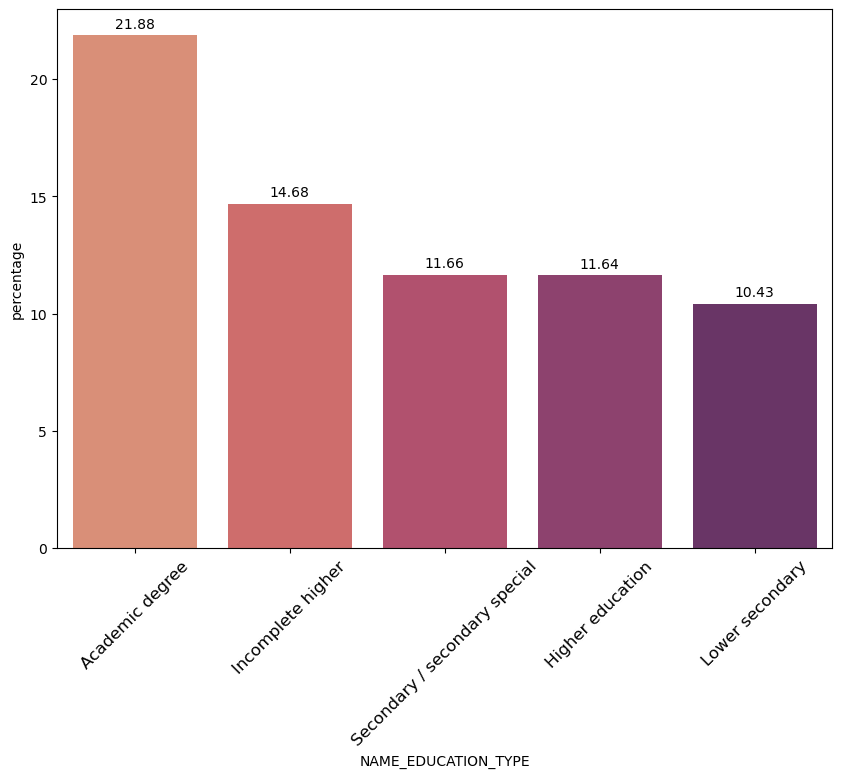

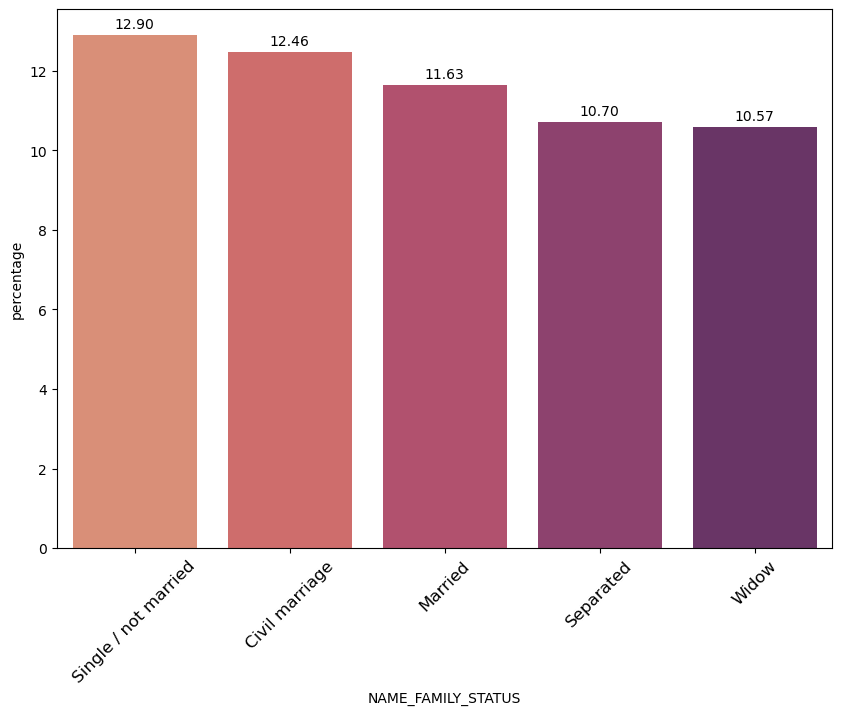

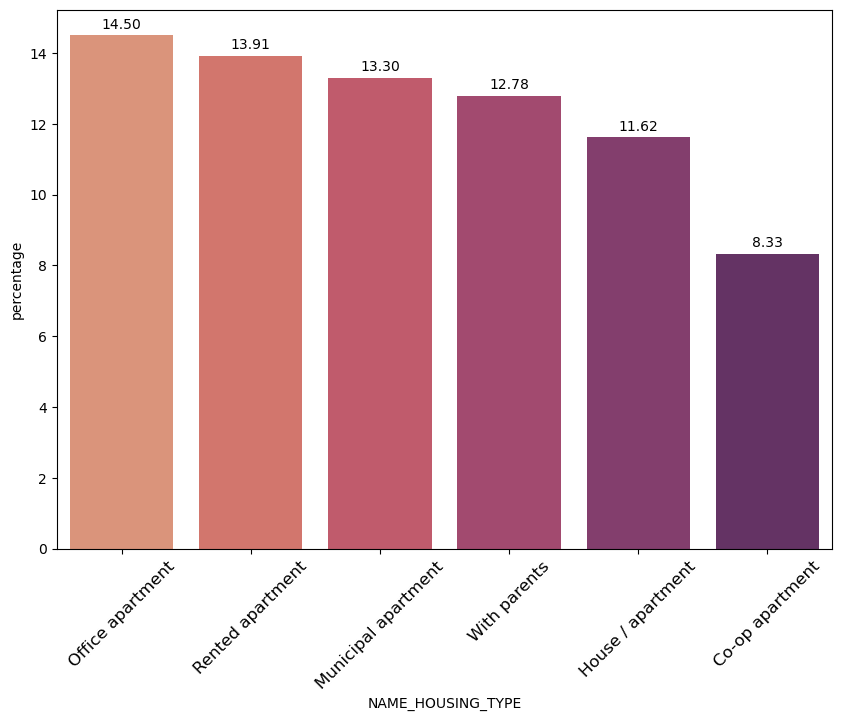

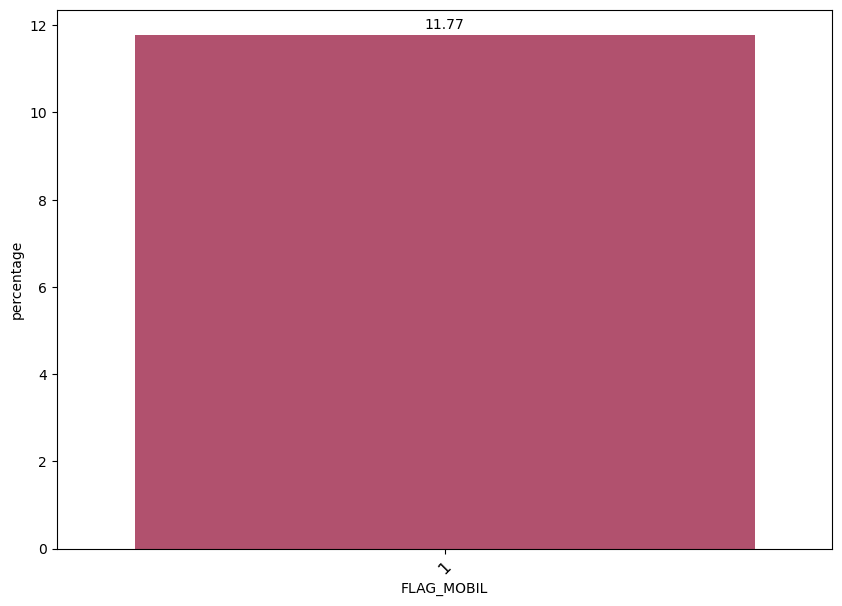

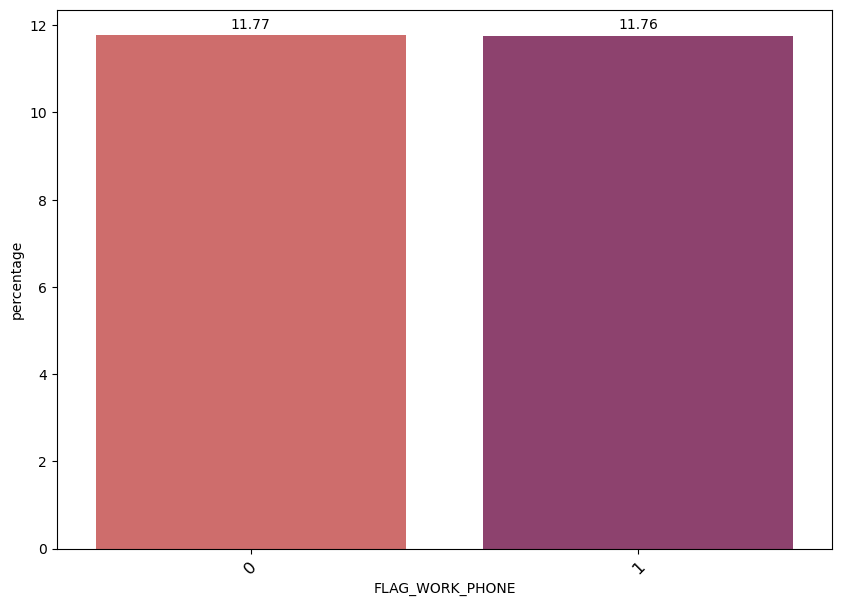

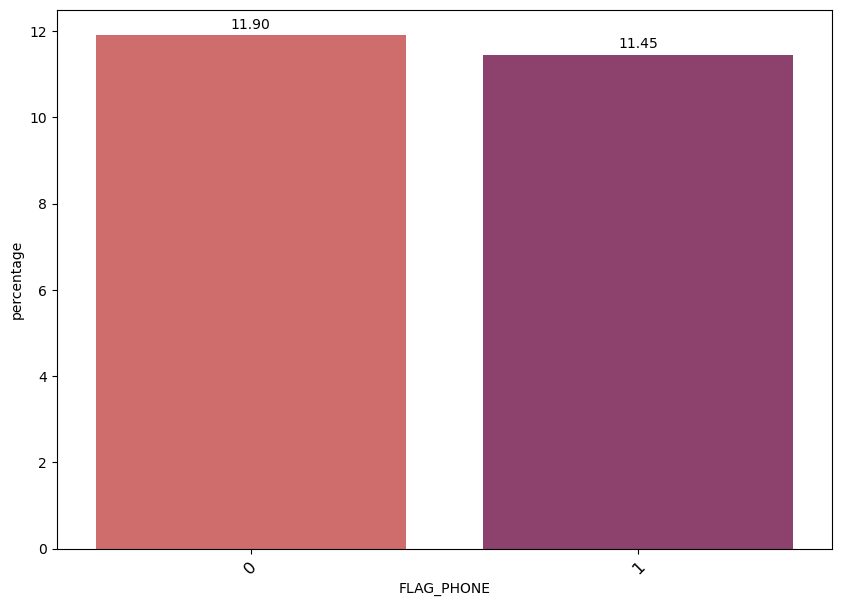

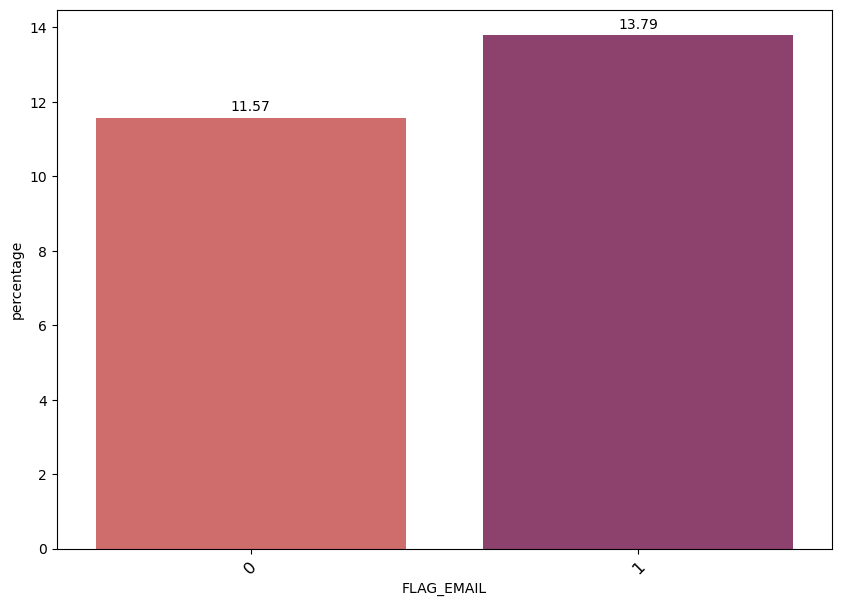

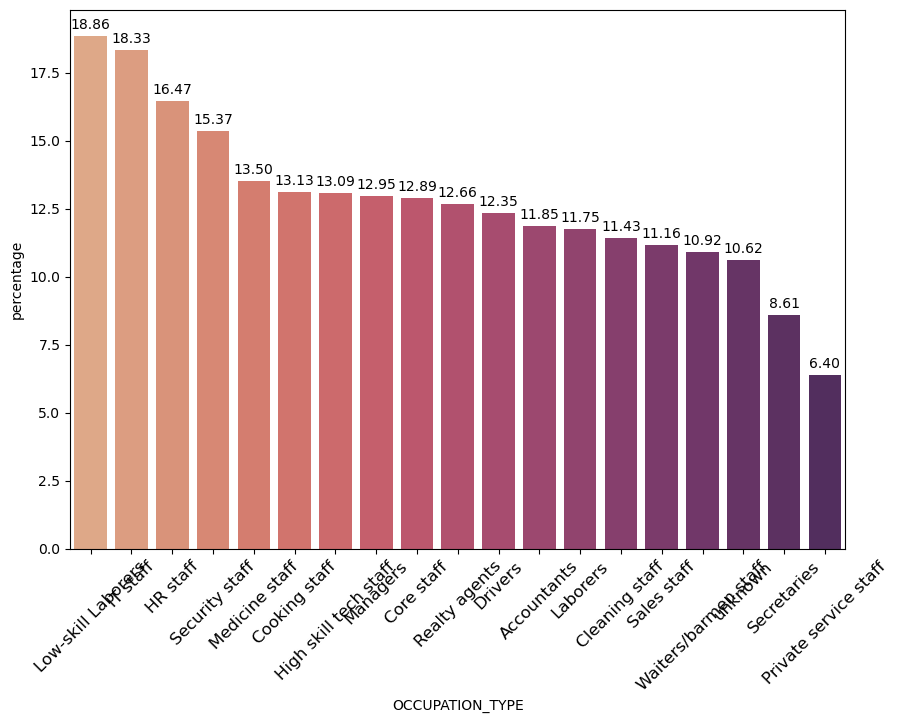

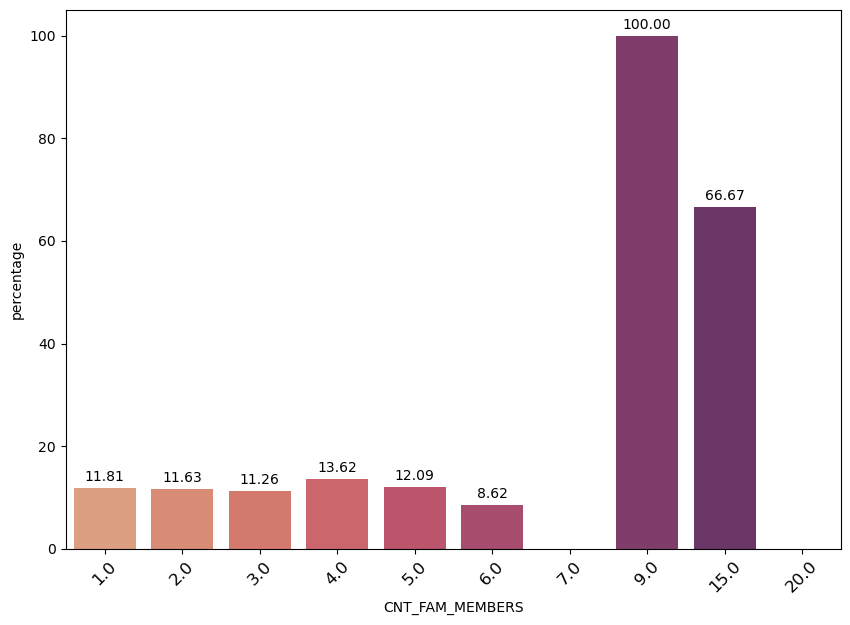

In [111]:
for i in cats:
  percentage_risky(df,i)

As we see the percentage of risky creditor, we can conclude that

1.   The more family members the percentage of the trend of creditor's risk is increasing
2.   State servant has the higher risk of risky client which is around 12.9% of them are risky
3.   Academy education contributes the most risky client compared among other education level which is around 21.88%
4.   client who lives in office apartment has the highest risk among other housing type which is around 14.5%
5.   Around 2.31% of risky client are single

Next we will see the distribution based on age and years_employed

### Distribution of default client based on age and years employed

#### Based on age

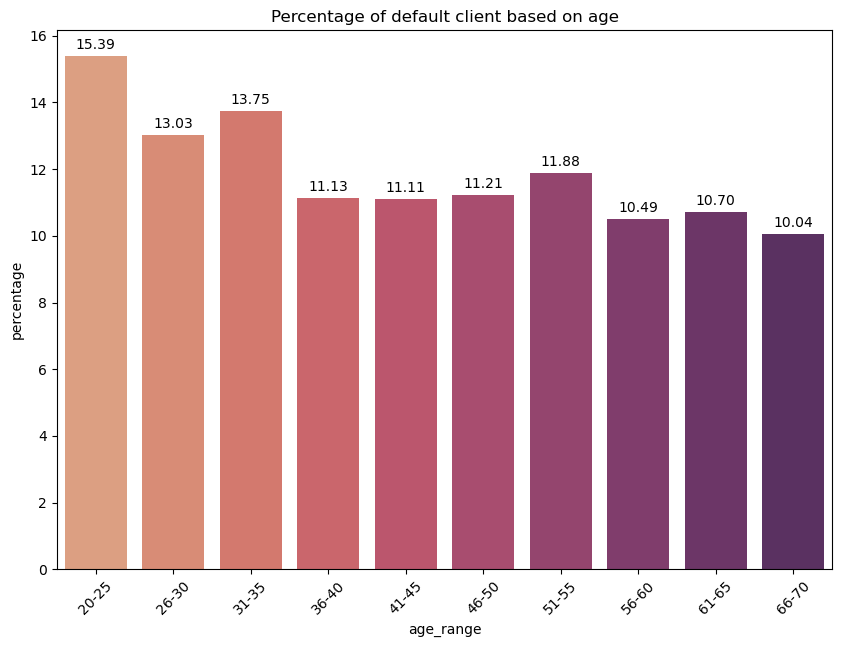

In [24]:
### Create a dataframe grouped by age and status = risky/default
df_age_risky = df[df['STATUS'] == 1].groupby(['Age'])['STATUS'].count().reset_index()
conditions = [(df_age_risky['Age'] > 20) & (df_age_risky['Age'] <= 25),
              (df_age_risky['Age'] > 25) & (df_age_risky['Age'] <= 30),
              (df_age_risky['Age'] > 30) & (df_age_risky['Age'] <= 35),
              (df_age_risky['Age'] > 35) & (df_age_risky['Age'] <= 40),
              (df_age_risky['Age'] > 40) & (df_age_risky['Age'] <= 45),
              (df_age_risky['Age'] > 45) & (df_age_risky['Age'] <= 50),
              (df_age_risky['Age'] > 50) & (df_age_risky['Age'] <= 55),
              (df_age_risky['Age'] > 55) & (df_age_risky['Age'] <= 60),
              (df_age_risky['Age'] > 60) & (df_age_risky['Age'] <= 65),
              (df_age_risky['Age'] > 65) & (df_age_risky['Age'] <= 70)
             ]
values = ['20-25', '26-30', '31-35', '36-40','41-45','46-50','51-55','56-60',
          '61-65','66-70']
### Create a new features called age_range
df_age_risky['age_range'] = np.select(conditions, values)
### Grouping previous dataframe based on age_range
df_age_risky=df_age_risky.groupby(['age_range'])['STATUS'].sum().reset_index()
### Create a dataframe grouped by age and status = risky/default and safe
df_age_total = df.groupby(['Age'])['STATUS'].count().reset_index()
conditions = [(df_age_total['Age'] > 20) & (df_age_total['Age'] <= 25),
              (df_age_total['Age'] > 25) & (df_age_total['Age'] <= 30),
              (df_age_total['Age'] > 30) & (df_age_total['Age'] <= 35),
              (df_age_total['Age'] > 35) & (df_age_total['Age'] <= 40),
              (df_age_total['Age'] > 40) & (df_age_total['Age'] <= 45),
              (df_age_total['Age'] > 45) & (df_age_total['Age'] <= 50),
              (df_age_total['Age'] > 50) & (df_age_total['Age'] <= 55),
              (df_age_total['Age'] > 55) & (df_age_total['Age'] <= 60),
              (df_age_total['Age'] > 60) & (df_age_total['Age'] <= 65),
              (df_age_total['Age'] > 65) & (df_age_total['Age'] <= 70)
             ]
values = ['20-25', '26-30', '31-35', '36-40','41-45','46-50','51-55','56-60',
          '61-65','66-70']
### Create a new features called age_range
df_age_total['age_range'] = np.select(conditions, values)
### Grouping previous dataframe based on age_range
df_age_total=df_age_total.groupby(['age_range'])['STATUS'].sum().reset_index()
### Create a merge dataframe between df_age_risky and df_age_total
df_join = pd.merge(df_age_risky, df_age_total, on='age_range')
### Calculate percentage of default client based on age_range
df_join['percentage'] = df_join['STATUS_x']/df_join['STATUS_y'] * 100

### Plot the result
fig, ax = plt.subplots(figsize=(10,7))
ax=sns.barplot(x='age_range', y='percentage', data=df_join, palette='flare')
for bar in ax.patches:
  ax.annotate(format(bar.get_height(), '.2f'),(bar.get_x() + bar.get_width() / 2,
                                               bar.get_height()), ha='center', 
              va='center', size=10, xytext=(0, 8), textcoords='offset points')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Percentage of default client based on age')
plt.show()

In [25]:
df[df['Age'] <= 35]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Age,years_employed,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,unknown,2.0,32.9,12.4,0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,unknown,2.0,32.9,12.4,0,1
18,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,...,1,0,0,0,Accountants,2.0,29.2,3.0,0,1
19,5008826,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,...,1,0,0,0,Accountants,2.0,29.2,3.0,-1,1
20,5008830,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,1,0,Laborers,2.0,27.5,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36448,5149158,M,Y,Y,0,247500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,1,0,0,Laborers,2.0,30.0,9.8,0,1
36449,5149190,M,Y,N,1,450000.0,Working,Higher education,Married,House / apartment,...,1,0,1,1,Core staff,3.0,27.0,1.4,0,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,1,0,1,1,Medicine staff,2.0,33.9,3.6,0,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,1,0,1,1,Medicine staff,2.0,33.9,3.6,0,1


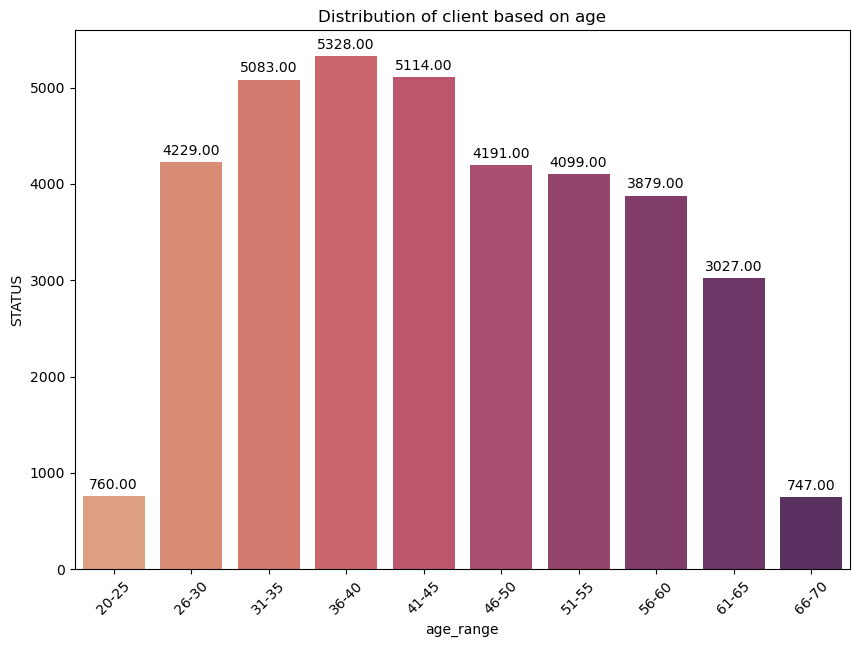

In [26]:
fig, ax = plt.subplots(figsize=(10,7))
ax=sns.barplot(x='age_range', y='STATUS', data=df_age_total, palette='flare')
for bar in ax.patches:
  ax.annotate(format(bar.get_height(), '.2f'),(bar.get_x() + bar.get_width() / 2,
                                               bar.get_height()), ha='center', 
              va='center', size=10, xytext=(0, 8), textcoords='offset points')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Distribution of client based on age')
plt.show()

From above plot we could see that the client with age between 20-25 years has higher percentage of become default client which is around 15.4%. Next we will see the distribution of default client based on years employed

#### Based on years employed

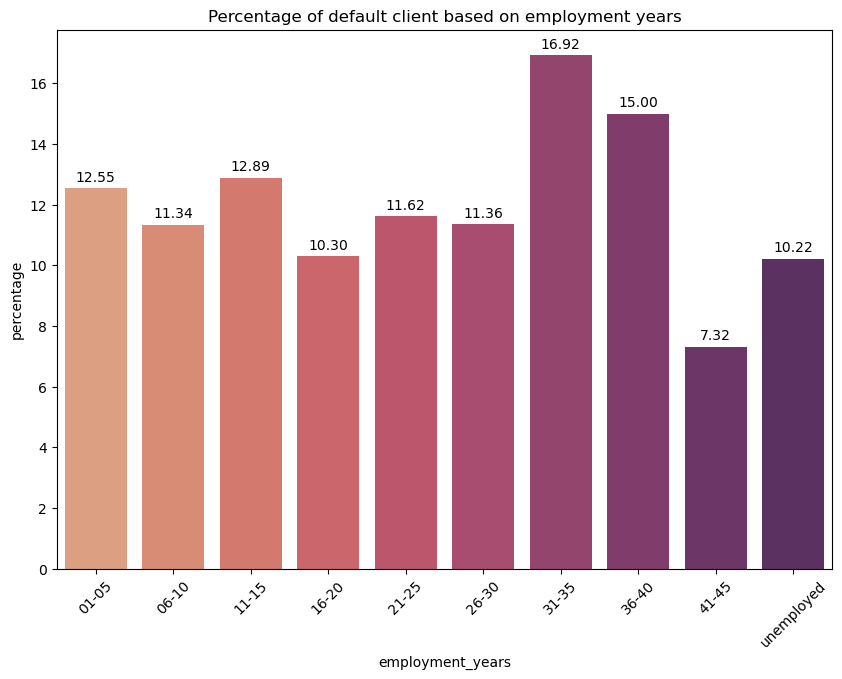

In [116]:
### Create a dataframe grouped by age and status = risky/default
df_employ_risky = df[df['STATUS'] == 1].groupby(['years_employed'])['STATUS'].count().reset_index()
conditions = [(df_employ_risky['years_employed'] == 0),
              (df_employ_risky['years_employed'] > 0) & (df_employ_risky['years_employed'] < 5),
              (df_employ_risky['years_employed'] >= 5) & (df_employ_risky['years_employed'] < 10),
              (df_employ_risky['years_employed'] >= 10) & (df_employ_risky['years_employed'] < 15),
              (df_employ_risky['years_employed'] >= 15) & (df_employ_risky['years_employed'] < 20),
              (df_employ_risky['years_employed'] >= 20) & (df_employ_risky['years_employed'] < 25),
              (df_employ_risky['years_employed'] >= 25) & (df_employ_risky['years_employed'] < 30),
              (df_employ_risky['years_employed'] >= 30) & (df_employ_risky['years_employed'] < 35),
              (df_employ_risky['years_employed'] >= 35) & (df_employ_risky['years_employed'] < 40),
              (df_employ_risky['years_employed'] >= 40) & (df_employ_risky['years_employed'] < 45)
             ]
values = ['unemployed','01-05', '06-10', '11-15', '16-20','21-25','26-30','31-35','36-40',
          '41-45']
### Create a new features called employment_years
df_employ_risky['employment_years'] = np.select(conditions, values)
### Grouping previous dataframe based on employment_years
df_employ_risky=df_employ_risky.groupby(['employment_years'])['STATUS'].sum().reset_index()
### Create a dataframe grouped by age and status = risky/default and safe
df_employ_total = df.groupby(['years_employed'])['STATUS'].count().reset_index()
conditions = [(df_employ_total['years_employed'] == 0),
              (df_employ_total['years_employed'] > 0) & (df_employ_total['years_employed'] < 5),
              (df_employ_total['years_employed'] >= 5) & (df_employ_total['years_employed'] < 10),
              (df_employ_total['years_employed'] >= 10) & (df_employ_total['years_employed'] < 15),
              (df_employ_total['years_employed'] >= 15) & (df_employ_total['years_employed'] < 20),
              (df_employ_total['years_employed'] >= 20) & (df_employ_total['years_employed'] < 25),
              (df_employ_total['years_employed'] >= 25) & (df_employ_total['years_employed'] < 30),
              (df_employ_total['years_employed'] >= 30) & (df_employ_total['years_employed'] < 35),
              (df_employ_total['years_employed'] >= 35) & (df_employ_total['years_employed'] < 40),
              (df_employ_total['years_employed'] >= 40) & (df_employ_total['years_employed'] < 45)
             ]
values = ['unemployed','01-05', '06-10', '11-15', '16-20','21-25','26-30','31-35','36-40',
          '41-45']
### Create a new features called employment_years
df_employ_total['employment_years'] = np.select(conditions, values)
### Grouping previous dataframe based on employment_years
df_employ_total=df_employ_total.groupby(['employment_years'])['STATUS'].sum().reset_index()
### Create a merge dataframe between df_employ_risky and df_employ_total
df_join = pd.merge(df_employ_risky, df_employ_total, on='employment_years').sort_values(by='employment_years')
### Calculate percentage of default client based on employment_years
df_join['percentage'] = df_join['STATUS_x']/df_join['STATUS_y'] * 100

### Plot the result
fig, ax = plt.subplots(figsize=(10,7))
ax=sns.barplot(x='employment_years', y='percentage', data=df_join, palette='flare')
for bar in ax.patches:
  ax.annotate(format(bar.get_height(), '.2f'),(bar.get_x() + bar.get_width() / 2,
                                               bar.get_height()), ha='center', 
              va='center', size=10, xytext=(0, 8), textcoords='offset points')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Percentage of default client based on employment years')
plt.show()

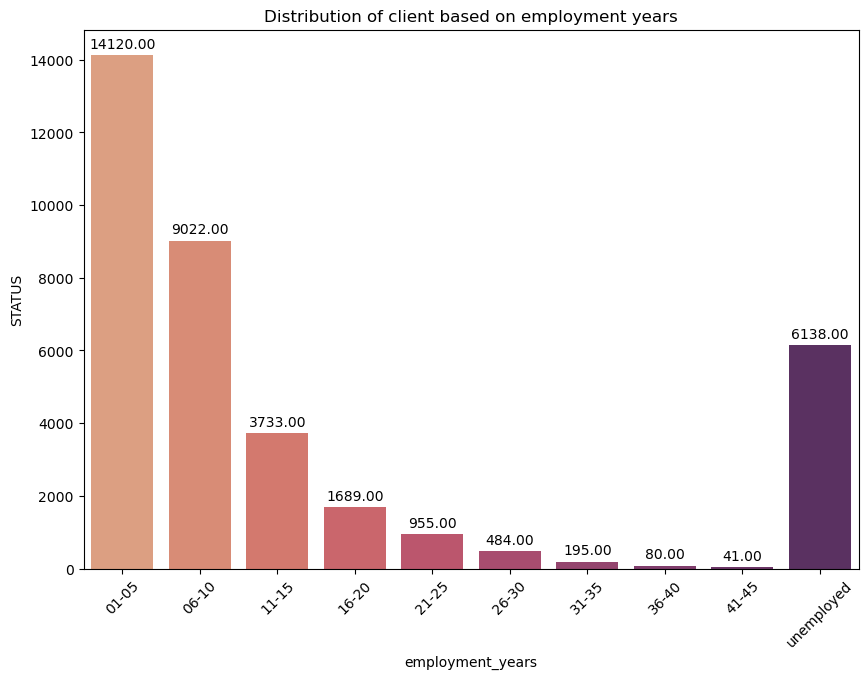

In [117]:
### Plot the result
fig, ax = plt.subplots(figsize=(10,7))
ax=sns.barplot(x='employment_years', y='STATUS', data=df_employ_total, palette='flare')
for bar in ax.patches:
  ax.annotate(format(bar.get_height(), '.2f'),(bar.get_x() + bar.get_width() / 2,
                                               bar.get_height()), ha='center', 
              va='center', size=10, xytext=(0, 8), textcoords='offset points')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Distribution of client based on employment years')
plt.show()

Based on employment_years, client with employment years of 31-35 years has higher default client which is around 16.92%

### Average plotting

#### Calculate the average income between default/not-default client

In [29]:
df.groupby(['STATUS'])['AMT_INCOME_TOTAL'].mean().reset_index()

,STATUS,AMT_INCOME_TOTAL
0,0,185785.986150
1,1,193430.405733


As we can see default client has higher income average then non-default one. Next we will see the average income based on each categorical variable

#### Distribution of average income based on each categorical features

In [120]:
def average_plotting(df,col,output,number,title):
    data_list = df[col].value_counts().index[:number].tolist()
    plt.figure(figsize=(15,7))
    ax=sns.barplot(x=col, y=output, data=df[df[col].isin(data_list)],order=data_list,palette='flare',ci=False,edgecolor="black")
    for bar in ax.patches:
      ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
    plt.title(title)
    plt.show()

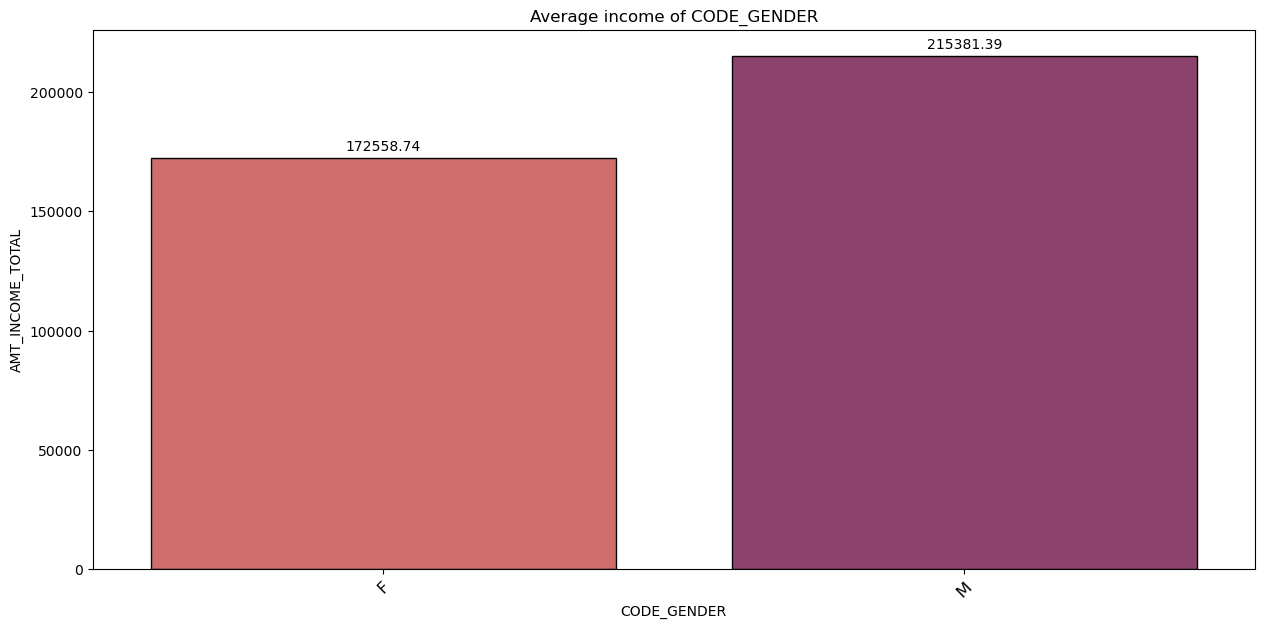

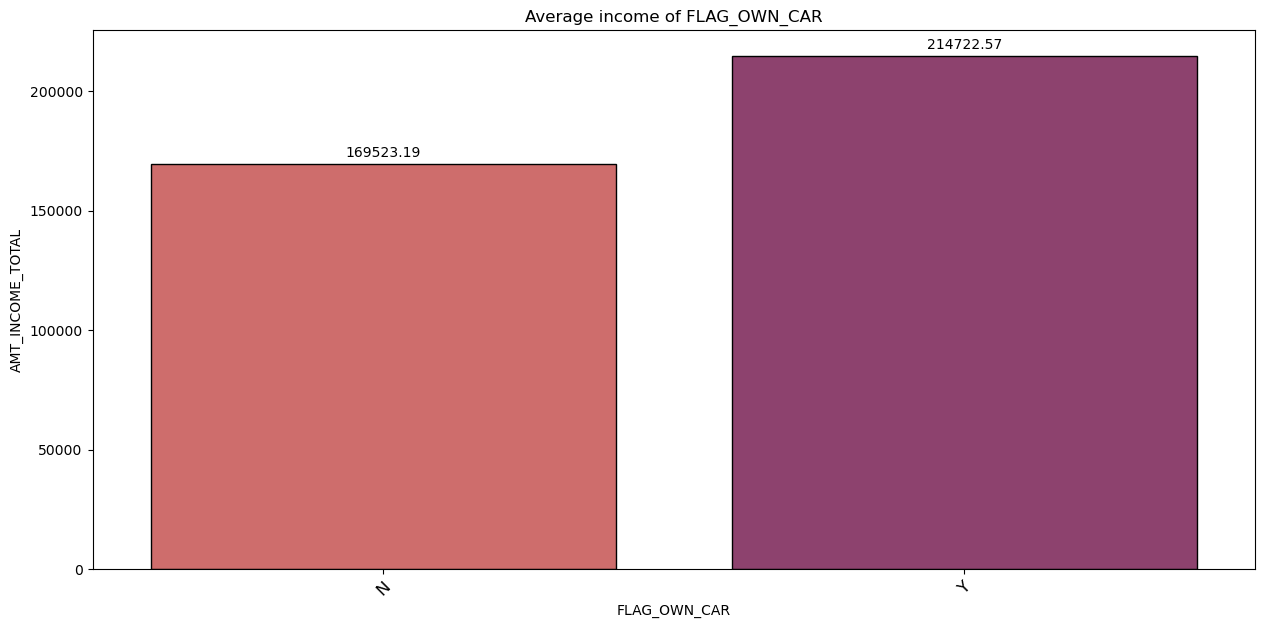

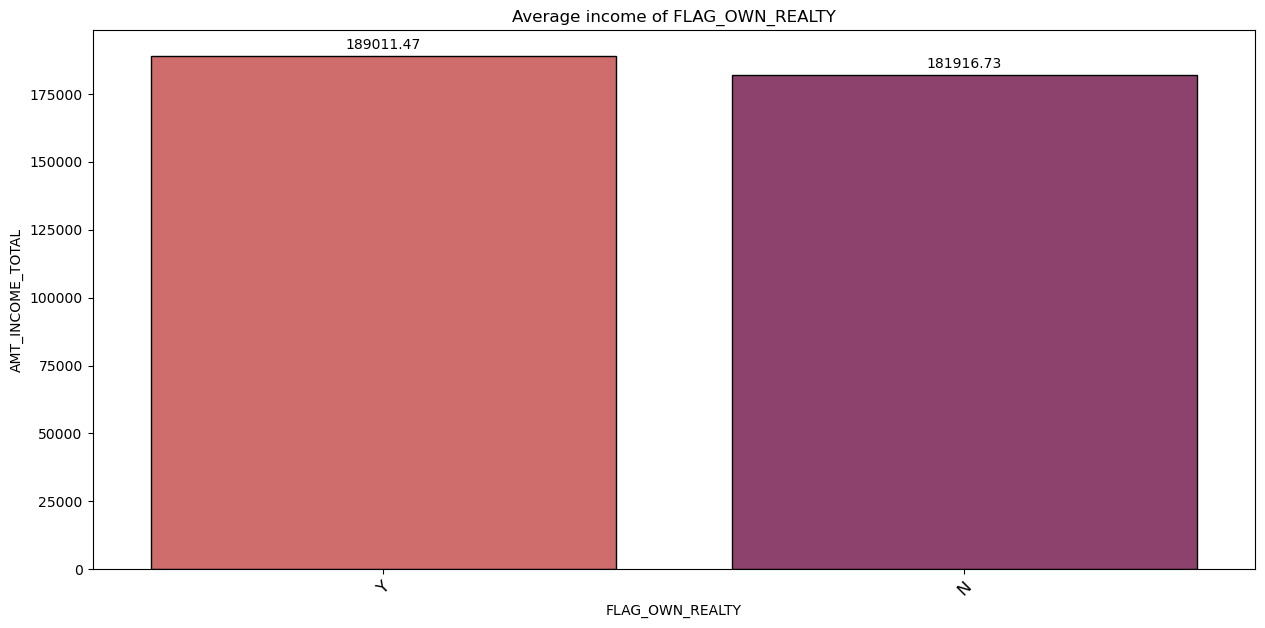

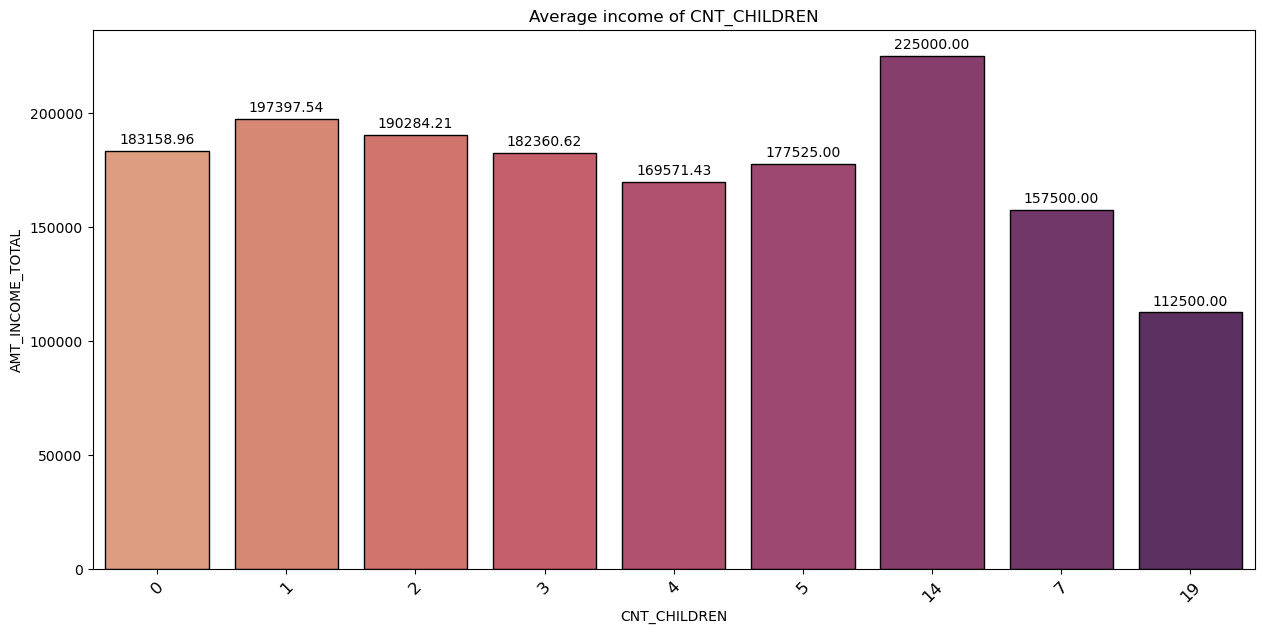

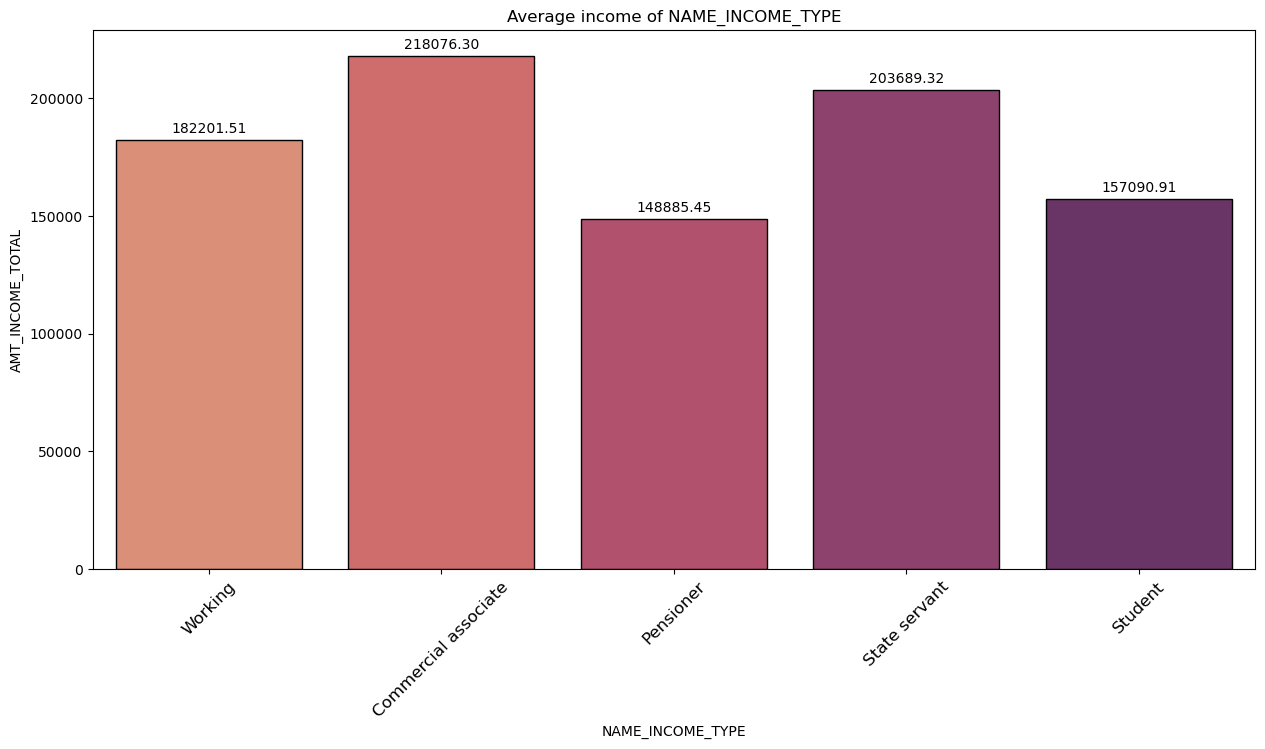

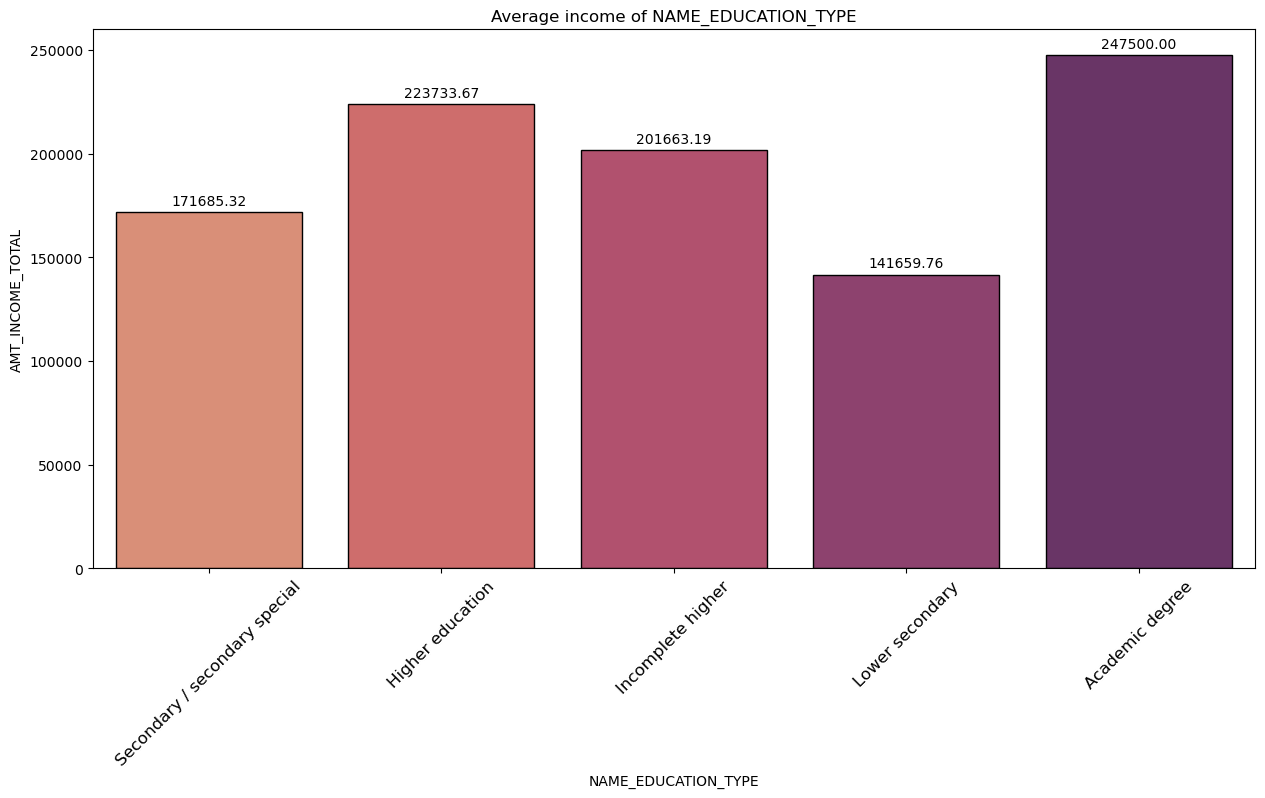

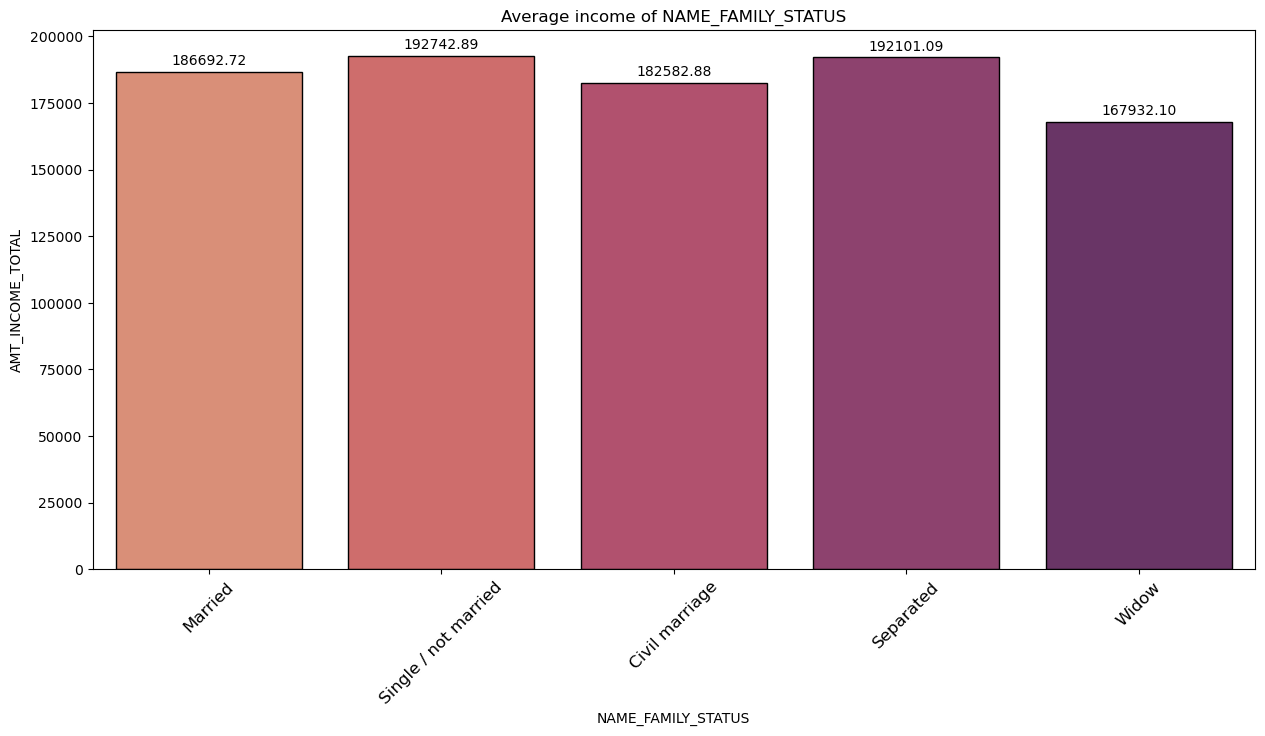

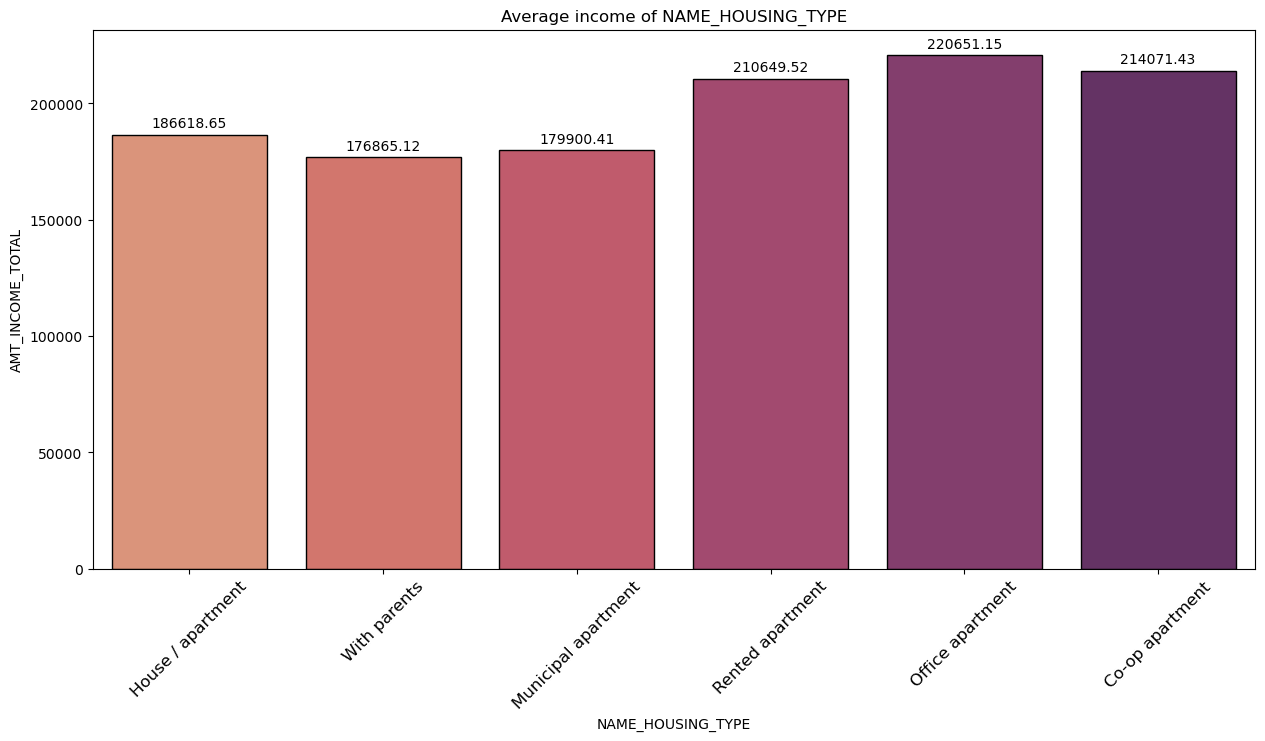

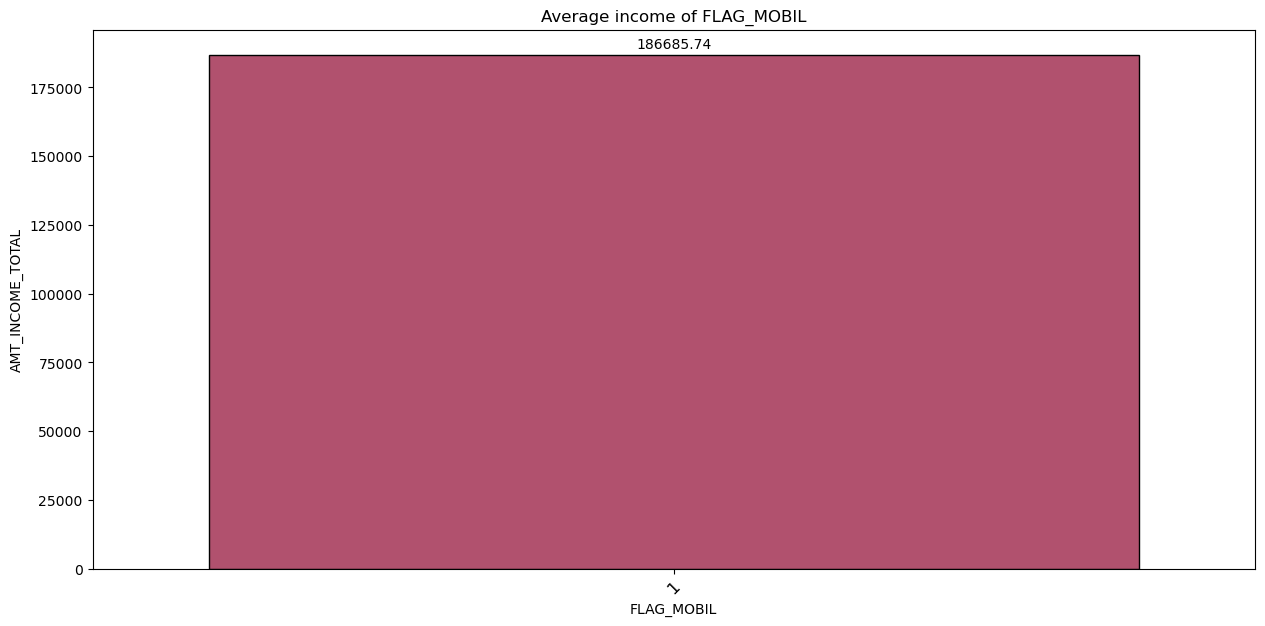

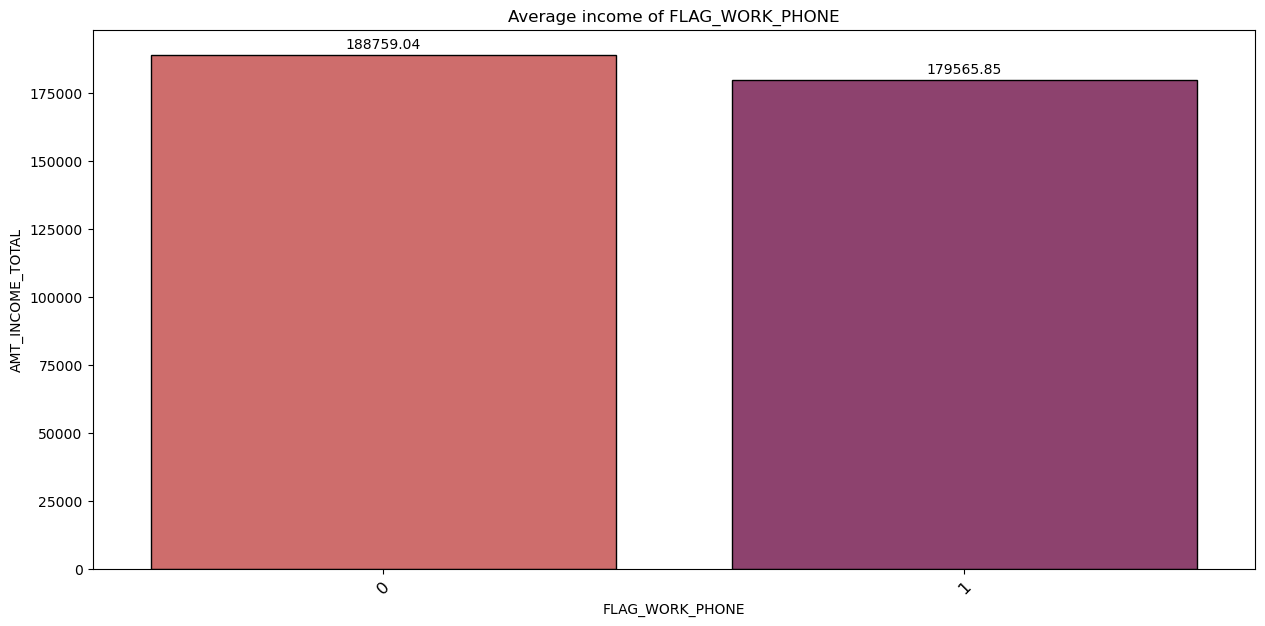

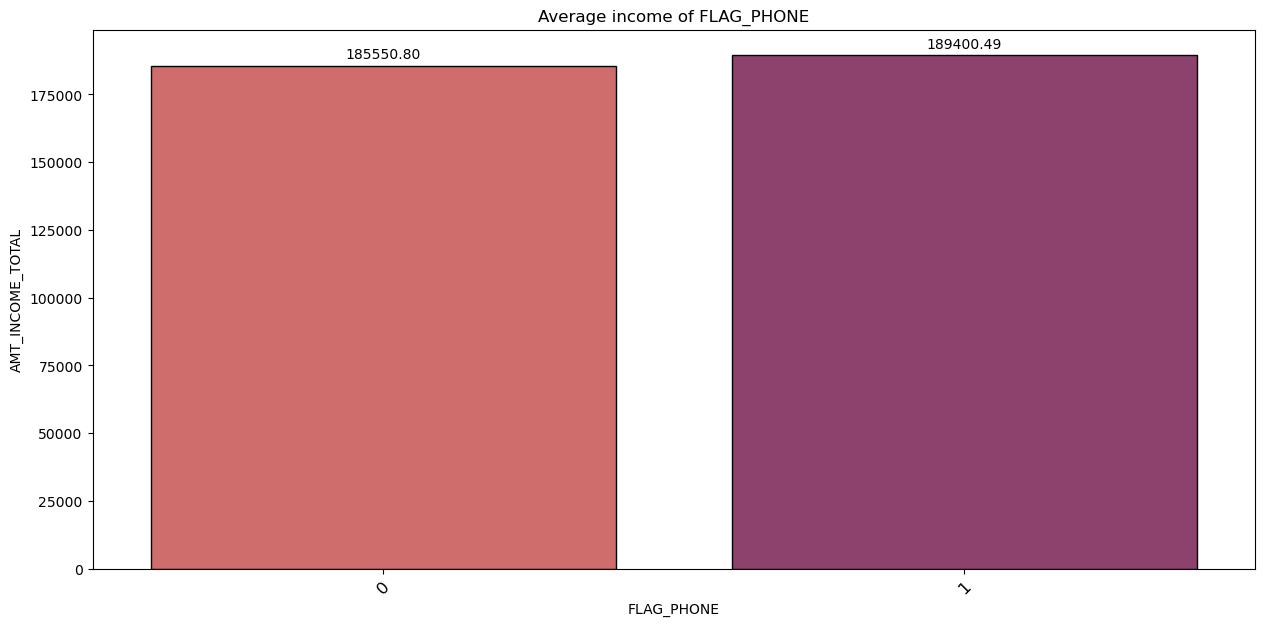

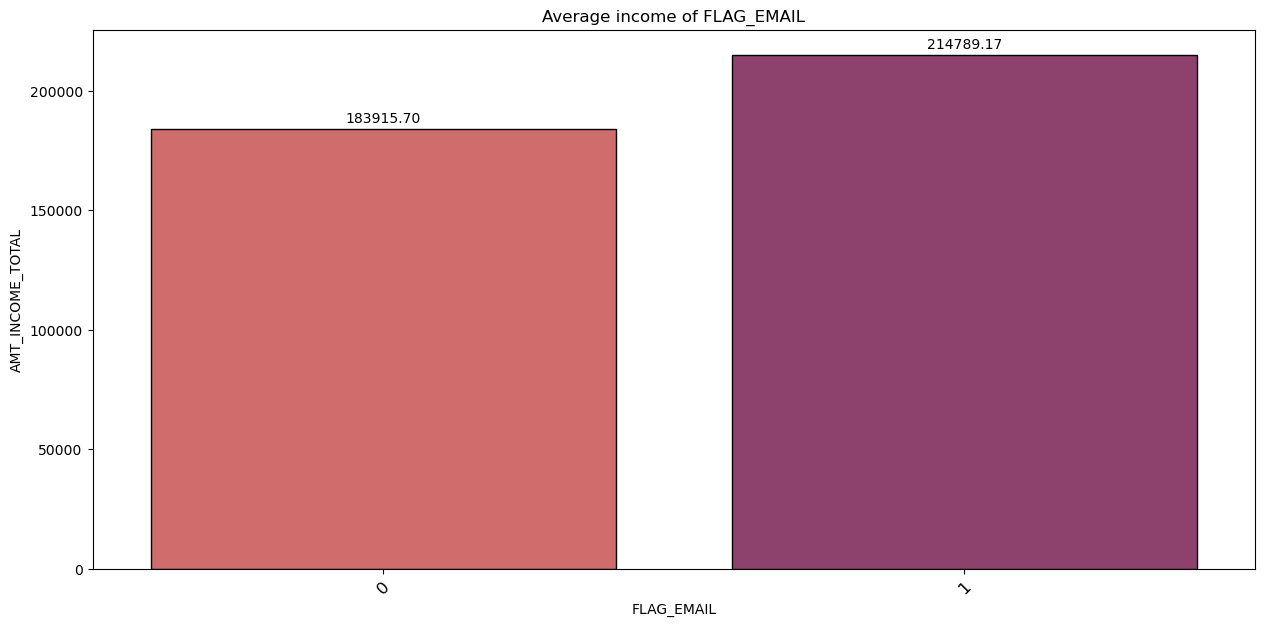

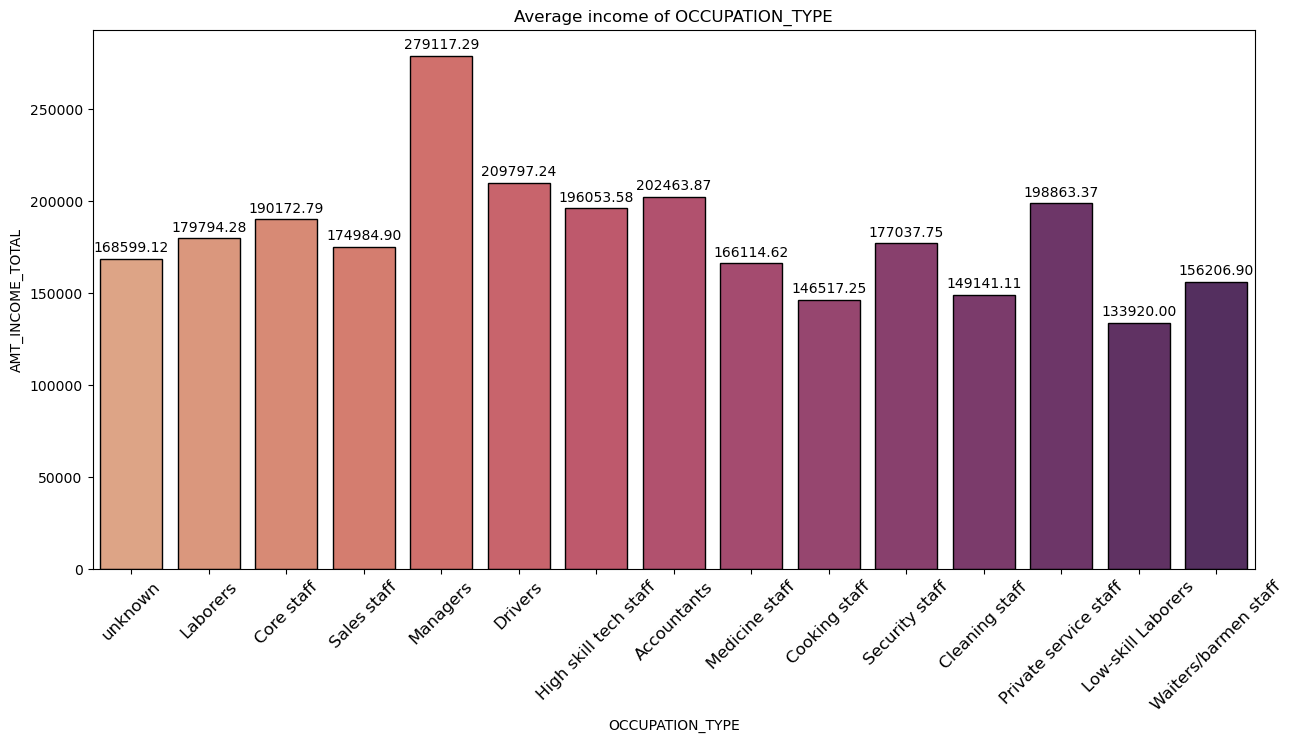

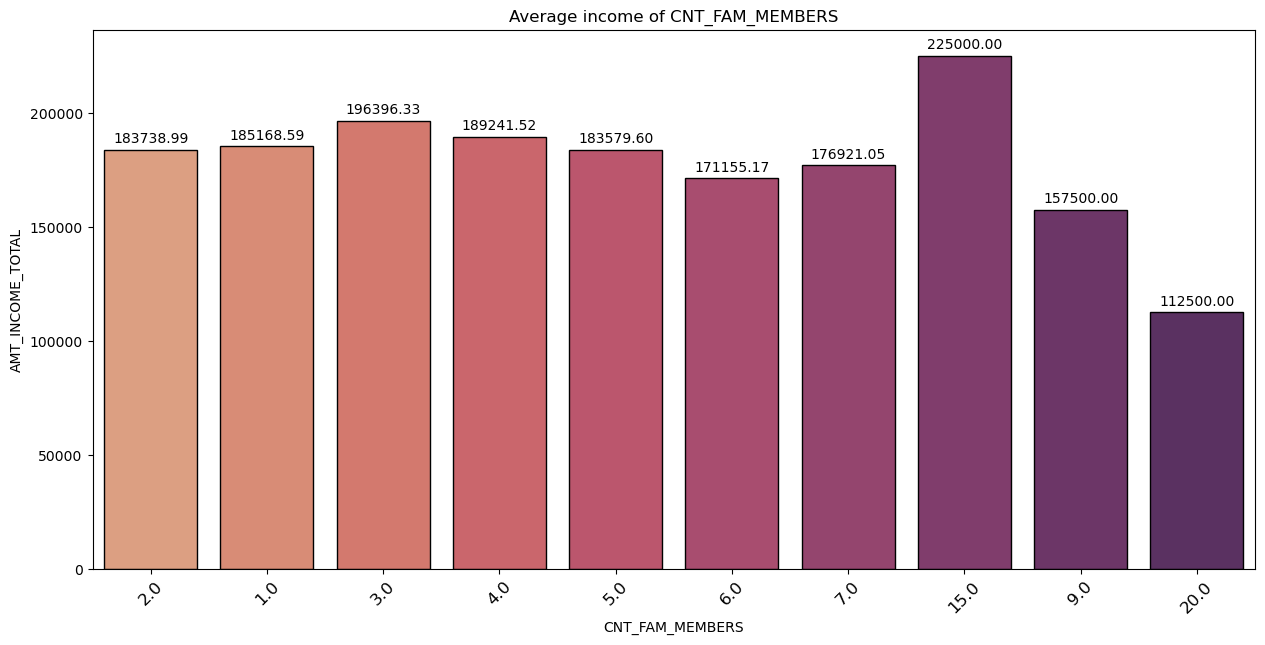

In [121]:
for i in cats:
  average_plotting(df,i,'AMT_INCOME_TOTAL',15,'Average income of {}'.format(i))

After calculating the average income of each features, we got some interesting facts:

1.   Commercial associate and state servant while having the highest annual income. But has the highest risk compared with others.
2.   Lower secondary education has the lowest income while also has the highest risk of late payment.
3.   Office apartment housing type has higher annual income compared with other housing type. But their risk of late payment is the highest among all of housing type. 

### Vintage Analysis

Vintage analysis measures the performance of a portfolio in different periods of time after the loan (or credit card) was granted. Performance can be measured in the form of cumulative charge-off rate, proportion of clients 30/60/90 days past due (DPD), utilization ratio, or average balance. Assuming the data taken from this month (January 2023)

In [32]:
df_cred = pd.read_csv('credit_record.csv')
# df_cred = pd.read_csv('/content/gdrive/MyDrive/Dibimbing/data/credit_record.csv')
grouped = df_cred.groupby('ID')
### convert df_cred data to wide format which every ID is a row
pivot_tb = df_cred.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')
pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min() # smallest value of MONTHS_BALANCE, is the month when loan was granted
pivot_tb['end_month'] = grouped['MONTHS_BALANCE'].max() # biggest value of MONTHS_BALANCE, might be observe over or canceling account
pivot_tb['ID'] = pivot_tb.index
pivot_tb = pivot_tb[['ID', 'open_month', 'end_month']]
### Create conditions
conditions = [(pivot_tb['open_month'] >= -6),
             (pivot_tb['open_month'] < -6) & (pivot_tb['open_month'] >= -12),
             (pivot_tb['open_month'] < -12) & (pivot_tb['open_month'] >= -18),
             (pivot_tb['open_month'] < -18) & (pivot_tb['open_month'] >= -24),
             (pivot_tb['open_month'] < -24) & (pivot_tb['open_month'] >= -30),
             (pivot_tb['open_month'] < -30) & (pivot_tb['open_month'] >= -36),
             (pivot_tb['open_month'] < -36) & (pivot_tb['open_month'] >= -42),
             (pivot_tb['open_month'] < -42) & (pivot_tb['open_month'] >= -48),
             (pivot_tb['open_month'] < -48) & (pivot_tb['open_month'] >= -54),
             (pivot_tb['open_month'] < -54) & (pivot_tb['open_month'] >= -60),
             ]
### Create values
values = ['2nd half of 2022', '1st half of 2022', '2nd half of 2021', '1st half of 2021','2nd half of 2020','1st half of 2020','2nd half of 2019','1st half of 2019','2nd half of 2018','1st half of 2018']
# create a new column and use np.select to assign values to it using our lists as arguments
pivot_tb['open_acc'] = np.select(conditions, values)
pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month'] # calculate observe window
pivot_tb.reset_index(drop = True, inplace = True)
df_cred = pd.merge(df_cred, pivot_tb, on = 'ID', how = 'left') # join calculated information
credit0 = df_cred.copy()
df_cred = df_cred[df_cred['window'] > 6] # delete users whose observe window less than 20
df_cred['status'] = np.where((df_cred['STATUS'] == '2') | (df_cred['STATUS'] == '3' )| (df_cred['STATUS'] == '4' )| (df_cred['STATUS'] == '5'), 1, 0) # analyze > 60 days past due 
df_cred['status'] = df_cred['status'].astype(np.int8) # 1: overdue 0: not
df_cred['month_on_book'] = df_cred['MONTHS_BALANCE'] - df_cred['open_month'] # calculate month on book: how many months after opening account
df_cred.sort_values(by = ['ID','month_on_book'], inplace = True)

##### denominator
denominator = pivot_tb.groupby(['open_acc']).agg({'ID': ['count']}) # count how many users in every month the account was opened
denominator.reset_index(inplace = True)
denominator.columns = ['open_acc','sta_sum']

##### ventage table
vintage = df_cred.groupby(['open_acc','month_on_book']).agg({'ID': ['count']}) 
vintage.reset_index(inplace = True)
vintage.columns = ['open_acc','month_on_book','sta_sum'] 
vintage['due_count'] = np.nan
vintage = vintage[['open_acc','month_on_book','due_count']] # delete aggerate column
vintage = pd.merge(vintage, denominator, on = ['open_acc'], how = 'left') # join sta_sum colun to vintage table
vintage

,open_acc,month_on_book,due_count,sta_sum
0,1st half of 2018,0,NaN,2617
1,1st half of 2018,1,NaN,2617
2,1st half of 2018,2,NaN,2617
3,1st half of 2018,3,NaN,2617
4,1st half of 2018,4,NaN,2617
...,...,...,...,...
328,2nd half of 2021,14,NaN,5737
329,2nd half of 2021,15,NaN,5737
330,2nd half of 2021,16,NaN,5737
331,2nd half of 2021,17,NaN,5737


In [33]:
for j in values: # outer loop: month in which account was opened
    ls = []
    for i in range(0,61): # inner loop time after the df_cred card was granted
        due = list(df_cred[(df_cred['status'] == 1) & (df_cred['month_on_book'] == i) & (df_cred['open_acc'] == j)]['ID']) # get ID which satisfy the condition
        ls.extend(due) # As time goes, add bad clients
        vintage.loc[(vintage['month_on_book'] == i) & (vintage['open_acc'] == j), 'due_count'] = len(set(ls)) # calculate non-duplicate ID numbers using set()
        
vintage['sta_rate']  = vintage['due_count'] / vintage['sta_sum'] # calculate cumulative % of bad clients
vintage 

,open_acc,month_on_book,due_count,sta_sum,sta_rate
0,1st half of 2018,0,0.0,2617,0.000000
1,1st half of 2018,1,0.0,2617,0.000000
2,1st half of 2018,2,4.0,2617,0.001528
3,1st half of 2018,3,8.0,2617,0.003057
4,1st half of 2018,4,14.0,2617,0.005350
...,...,...,...,...,...
328,2nd half of 2021,14,57.0,5737,0.009936
329,2nd half of 2021,15,57.0,5737,0.009936
330,2nd half of 2021,16,57.0,5737,0.009936
331,2nd half of 2021,17,57.0,5737,0.009936


In [34]:
### Vintage wide table
vintage_wide = vintage.pivot(index = 'open_acc',
                             columns = 'month_on_book',
                             values = 'sta_rate')
vintage_wide
custom_dict = {'2nd half of 2022':9, '1st half of 2022':8, '2nd half of 2021':7, '1st half of 2021':6,'2nd half of 2020':5,'1st half of 2020':4,'2nd half of 2019':3,'1st half of 2019':2,'2nd half of 2018':1,'1st half of 2018':0} 
vintage_wide.sort_index(key=lambda x: x.map(custom_dict))

month_on_book,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
open_acc,,,,,,,,,,,,,,,,,,,,,
1st half of 2018,0.000000,0.000000,0.001528,0.003057,0.005350,0.006878,0.008407,0.011846,0.012228,0.014520,...,0.032480,0.032480,0.032480,0.032862,0.033244,0.033244,0.033244,0.033626,0.033626,0.033626
2nd half of 2018,0.000000,0.000940,0.002506,0.003759,0.005952,0.006892,0.008772,0.010965,0.011278,0.013471,...,0.023183,0.023183,0.023183,0.023183,NaN,NaN,NaN,NaN,NaN,NaN
1st half of 2019,0.000000,0.000554,0.000831,0.002492,0.004153,0.005260,0.007475,0.009967,0.010244,0.011628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd half of 2019,0.000226,0.000451,0.001128,0.001805,0.004512,0.005188,0.006316,0.007895,0.009023,0.010377,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st half of 2020,0.000000,0.000000,0.000679,0.001132,0.001585,0.002717,0.003396,0.004981,0.006339,0.007018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd half of 2020,0.000000,0.000000,0.000413,0.001653,0.002685,0.004338,0.004545,0.006610,0.007230,0.008263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st half of 2021,0.000000,0.000000,0.000941,0.002071,0.002824,0.003954,0.005084,0.006025,0.006778,0.006967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd half of 2021,0.000000,0.000000,0.000349,0.001569,0.002266,0.003312,0.003660,0.004706,0.005752,0.006275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st half of 2022,0.000000,0.000161,0.001612,0.002256,0.002901,0.004674,0.005963,0.007736,0.008864,0.009992,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


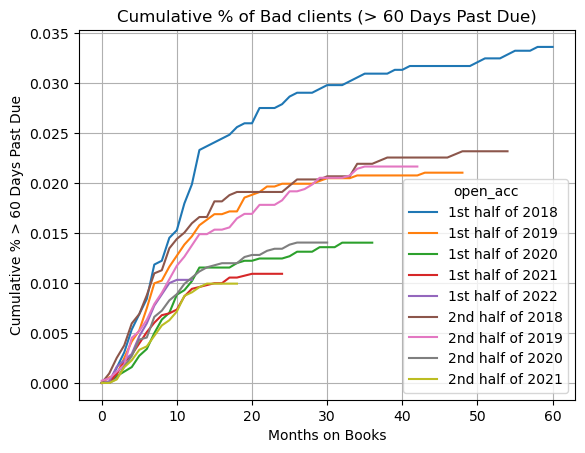

In [35]:
# plot vintage line chart
plt.rcParams['figure.facecolor'] = 'white'
vintage0 = vintage_wide.replace(0,np.nan)
lst = [i for i in range(0,61)]
vintage_wide[lst].T.plot(grid = True, title = 'Cumulative % of Bad clients (> 60 Days Past Due)')
#plt.axvline(30)
#plt.axvline(25)
#plt.axvline(20)
plt.xlabel('Months on Books')
plt.ylabel('Cumulative % > 60 Days Past Due')
plt.show()

As we can see the bad client rate is increasing rapidly around 0 - 15 months on books. After that the increament of bad client rate is decline steadily.

## Data Preprocessing

### Feature Selection

Let's see all columns in the dataset

By using logic, there are some unnecessary columns which are ['ID', 'DAYS_BIRTH', 'MONTHS_BALANCE', 'FLAG_WORK_PHONE', 'FLAG_EMAIL', FLAG_MOBIL', 'DAYS_EMPLOYED', 'CNT_CHILDREN']. Let's drop those columns

In [36]:
### Building dataframe for machine learning model
df_cred['STATUS'] = df_cred['STATUS'].map({"X":0,"C":0, "0":0, "1":1, "2":1, "3":1, "4":1, "5":1})
df_model = pd.merge(df_app0, df_cred, on = 'ID')

In [37]:
#drop unnessesary columns
df_model = df_model.drop(['ID','DAYS_BIRTH','MONTHS_BALANCE','FLAG_WORK_PHONE','FLAG_EMAIL', 'FLAG_MOBIL', 'DAYS_EMPLOYED', 'CNT_CHILDREN','open_month','end_month','open_acc','window','status'],axis=1)

In [38]:
df_model = df_model[['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                     'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                     'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_PHONE',
                     'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'Age',
                     'years_employed','month_on_book', 'STATUS']]
df_model

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Age,years_employed,month_on_book,STATUS
0,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,0,unknown,2.0,32.9,12.4,0,0
1,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,0,unknown,2.0,32.9,12.4,1,0
2,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,0,unknown,2.0,32.9,12.4,2,1
3,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,0,unknown,2.0,32.9,12.4,3,0
4,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,0,unknown,2.0,32.9,12.4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745458,M,N,Y,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,0,Laborers,1.0,25.2,3.3,9,0
745459,M,N,Y,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,0,Laborers,1.0,25.2,3.3,10,0
745460,M,N,Y,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,0,Laborers,1.0,25.2,3.3,11,0
745461,M,N,Y,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,0,Laborers,1.0,25.2,3.3,12,0


### Processing categorical variable

*   For categorical variable with binary output, we will use label encoder
*   For categorical variable with multiple output, we will use one hot encoding
*   For education type, because the value is ordinal we will use ordinal encoding





In [39]:
# start label enncoder
column_data = ["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY"]
for col in column_data:
    label = LabelEncoder()
    df_model[col] = label.fit_transform(df_model[col].values)

In [40]:
### Ordinal encoding
df_model["NAME_EDUCATION_TYPE"] = df_model["NAME_EDUCATION_TYPE"].map({"'Lower secondary'":1,"Secondary / secondary special":2, "Incomplete higher":3, "Higher education":4, "Academic degree":5})

In [41]:
multiple_cats = ['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                 'NAME_HOUSING_TYPE','OCCUPATION_TYPE', "NAME_INCOME_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE"]
df_preprocess = pd.get_dummies(df_model, drop_first=True, columns=multiple_cats)
df_preprocess.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,FLAG_PHONE,CNT_FAM_MEMBERS,Age,years_employed,month_on_book,STATUS,...,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,1,1,1,427500.0,0,2.0,32.9,12.4,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,1,1,427500.0,0,2.0,32.9,12.4,1,0,...,1,0,0,0,0,0,0,0,1,0
2,1,1,1,427500.0,0,2.0,32.9,12.4,2,1,...,1,0,0,0,0,0,0,0,1,0
3,1,1,1,427500.0,0,2.0,32.9,12.4,3,0,...,1,0,0,0,0,0,0,0,1,0
4,1,1,1,427500.0,0,2.0,32.9,12.4,4,0,...,1,0,0,0,0,0,0,0,1,0


In [42]:
input = df_preprocess.drop('STATUS', axis=1)
output = df_preprocess['STATUS']

### Scaling the data

In [43]:
df_preprocess.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL',
       'FLAG_PHONE', 'CNT_FAM_MEMBERS', 'Age', 'years_employed',
       'month_on_book', 'STATUS', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_3.0',
       'NAME_EDUCATION_TYPE_4.0', 'NAME_EDUCATION_TYPE_5.0',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'OCCUPATION_TYPE_Cleaning staff', 'OCCUPATION_TYPE_Cooking staff',
       'OCCUPATION_TYPE_Core staff', 'OCCUPATION_TYPE_Drivers',
       'OCCUPATION_TYPE_HR staff', 'OCCUPATION_TYPE_High skill tech staff',
       'OCCUPATION_TYPE

In [44]:
# data standarization 
sc=StandardScaler()
input_scaled = sc.fit_transform(input)

In [45]:
feats = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL',
       'FLAG_PHONE', 'CNT_FAM_MEMBERS', 'Age', 'years_employed',
       'month_on_book', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_3.0',
       'NAME_EDUCATION_TYPE_4.0', 'NAME_EDUCATION_TYPE_5.0',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'OCCUPATION_TYPE_Cleaning staff', 'OCCUPATION_TYPE_Cooking staff',
       'OCCUPATION_TYPE_Core staff', 'OCCUPATION_TYPE_Drivers',
       'OCCUPATION_TYPE_HR staff', 'OCCUPATION_TYPE_High skill tech staff',
       'OCCUPATION_TYPE_IT staff', 'OCCUPATION_TYPE_Laborers',
       'OCCUPATION_TYPE_Low-skill Laborers', 'OCCUPATION_TYPE_Managers',
       'OCCUPATION_TYPE_Medicine staff',
       'OCCUPATION_TYPE_Private service staff',
       'OCCUPATION_TYPE_Realty agents', 'OCCUPATION_TYPE_Sales staff',
       'OCCUPATION_TYPE_Secretaries', 'OCCUPATION_TYPE_Security staff',
       'OCCUPATION_TYPE_Waiters/barmen staff', 'OCCUPATION_TYPE_unknown',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Working',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents']

In [46]:
input_df = pd.DataFrame(data = input_scaled, columns = feats)
new_df = pd.concat([input_df,output],axis=1)
new_df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,FLAG_PHONE,CNT_FAM_MEMBERS,Age,years_employed,month_on_book,NAME_INCOME_TYPE_Pensioner,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,STATUS
0,1.412958,1.242703,0.72148,2.351633,-0.657599,-0.232969,-1.008641,0.893258,-1.267034,-0.44307,...,-1.548942,-0.248367,-0.368741,-0.202319,-2.94279,-0.181224,-0.084965,8.438412,-0.219551,0
1,1.412958,1.242703,0.72148,2.351633,-0.657599,-0.232969,-1.008641,0.893258,-1.187606,-0.44307,...,-1.548942,-0.248367,-0.368741,-0.202319,-2.94279,-0.181224,-0.084965,8.438412,-0.219551,0
2,1.412958,1.242703,0.72148,2.351633,-0.657599,-0.232969,-1.008641,0.893258,-1.108178,-0.44307,...,-1.548942,-0.248367,-0.368741,-0.202319,-2.94279,-0.181224,-0.084965,8.438412,-0.219551,1
3,1.412958,1.242703,0.72148,2.351633,-0.657599,-0.232969,-1.008641,0.893258,-1.028750,-0.44307,...,-1.548942,-0.248367,-0.368741,-0.202319,-2.94279,-0.181224,-0.084965,8.438412,-0.219551,0
4,1.412958,1.242703,0.72148,2.351633,-0.657599,-0.232969,-1.008641,0.893258,-0.949322,-0.44307,...,-1.548942,-0.248367,-0.368741,-0.202319,-2.94279,-0.181224,-0.084965,8.438412,-0.219551,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745458,1.412958,-0.804697,0.72148,-0.752294,-0.657599,-1.337550,-1.695501,-0.463930,-0.552183,-0.44307,...,-1.548942,-0.248367,2.711934,-0.202319,-2.94279,-0.181224,-0.084965,8.438412,-0.219551,0
745459,1.412958,-0.804697,0.72148,-0.752294,-0.657599,-1.337550,-1.695501,-0.463930,-0.472755,-0.44307,...,-1.548942,-0.248367,2.711934,-0.202319,-2.94279,-0.181224,-0.084965,8.438412,-0.219551,0
745460,1.412958,-0.804697,0.72148,-0.752294,-0.657599,-1.337550,-1.695501,-0.463930,-0.393327,-0.44307,...,-1.548942,-0.248367,2.711934,-0.202319,-2.94279,-0.181224,-0.084965,8.438412,-0.219551,0
745461,1.412958,-0.804697,0.72148,-0.752294,-0.657599,-1.337550,-1.695501,-0.463930,-0.313899,-0.44307,...,-1.548942,-0.248367,2.711934,-0.202319,-2.94279,-0.181224,-0.084965,8.438412,-0.219551,0


### Reduce the features

As we can see the features is quite a lot. So to reduce the noise and simplified the features we will use PCA method

In [47]:
### Import library
from sklearn.decomposition import PCA

### Fit the data into PCA
pca = PCA(n_components=56) 
pca.fit(input_scaled)
pcs = pca.transform(input_scaled)
pcs

array([[-2.95284900e+00,  4.74414971e+00,  1.32262469e+00, ...,
        -1.42782116e-15, -4.54196803e-16, -1.55661583e-15],
       [-2.95240719e+00,  4.74316836e+00,  1.32274942e+00, ...,
        -1.42782116e-15, -4.54196803e-16, -1.55661583e-15],
       [-2.95196539e+00,  4.74218702e+00,  1.32287414e+00, ...,
        -1.42782116e-15, -4.54196803e-16, -1.55661583e-15],
       ...,
       [-2.66923313e+00,  6.92102465e+00, -8.43622800e-01, ...,
         3.48535675e-16, -4.54196803e-16, -1.58437141e-15],
       [-2.66879133e+00,  6.92004331e+00, -8.43498076e-01, ...,
         3.48535675e-16, -4.54196803e-16, -1.58437141e-15],
       [-2.66834952e+00,  6.91906196e+00, -8.43373352e-01, ...,
         6.66133815e-16,  0.00000000e+00, -1.55431223e-15]])

In [48]:
### Showing how much information coverage for each PCA
for i in range(3,57):
    print(i, 'components explaining: ',sum(pca.explained_variance_ratio_[:i])*100)

3 components explaining:  21.647928665805026
4 components explaining:  26.48386820885755
5 components explaining:  30.54768768573362
6 components explaining:  34.34540975202238
7 components explaining:  38.070711133469594
8 components explaining:  41.66041239575728
9 components explaining:  45.18547888326254
10 components explaining:  48.704426086544515
11 components explaining:  51.781642893462134
12 components explaining:  54.34002483896795
13 components explaining:  56.548810844764155
14 components explaining:  58.56744616412559
15 components explaining:  60.57122146788525
16 components explaining:  62.53603394769176
17 components explaining:  64.44838677239979
18 components explaining:  66.3081203695028
19 components explaining:  68.16264235286997
20 components explaining:  69.98941688331006
21 components explaining:  71.79930016564363
22 components explaining:  73.60760494705556
23 components explaining:  75.4093880663572
24 components explaining:  77.20236446701851
25 components 

By using 25 features we already cover around 80% of the original information from the data. So we will decide to use 25 features

In [49]:
pca = PCA(n_components=25)
pca.fit(input_scaled)
pcs = pca.transform(input_scaled)

input_scaled_pca = pd.DataFrame(data = pcs, columns = ['pc1','pc2','pc3', 'pc4', 'pc5', 'pc6',
                                          'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12',
                                          'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18',
                                          'pc19', 'pc20', 'pc21', 'pc22', 'pc23', 'pc24',
                                          'pc25'])
input_scaled_pca['output'] = output
input_scaled_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,output
0,-2.952697,4.744155,1.322809,-1.157261,-3.819767,-0.243745,-6.658365,1.298250,7.995322,-2.177555,...,-0.363141,0.598533,0.160402,0.354841,0.637262,0.076762,-0.496541,0.482798,-0.611563,0
1,-2.952255,4.743174,1.322936,-1.157369,-3.818138,-0.244163,-6.658939,1.298269,7.995218,-2.176500,...,-0.363094,0.610304,0.149775,0.333164,0.609806,0.075543,-0.478993,0.467553,-0.590347,0
2,-2.951813,4.742194,1.323062,-1.157476,-3.816509,-0.244581,-6.659513,1.298287,7.995114,-2.175445,...,-0.363046,0.622075,0.139149,0.311486,0.582349,0.074324,-0.461444,0.452308,-0.569131,1
3,-2.951371,4.741214,1.323189,-1.157584,-3.814880,-0.244998,-6.660086,1.298305,7.995009,-2.174389,...,-0.362999,0.633847,0.128523,0.289809,0.554893,0.073105,-0.443896,0.437064,-0.547914,0
4,-2.950929,4.740233,1.323316,-1.157691,-3.813251,-0.245416,-6.660660,1.298324,7.994905,-2.173334,...,-0.362951,0.645618,0.117897,0.268132,0.527437,0.071886,-0.426348,0.421819,-0.526698,0


### Handling imbalance target

First let's see the proportion of the target/output

In [50]:
X = input_scaled_pca.drop(columns='output')
y = input_scaled_pca['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [51]:
X_train = pd.DataFrame(data = X_train, columns = ['pc1','pc2','pc3', 'pc4', 'pc5', 'pc6',
                                          'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12',
                                          'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18',
                                          'pc19', 'pc20', 'pc21', 'pc22', 'pc23', 'pc24',
                                          'pc25'])
y_train = pd.DataFrame(data = y_train, columns = ['output'])
df_train = pd.concat([X_train, y_train], axis = 1)
df_train

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,output
316168,1.080063,-1.144710,0.757030,0.293353,0.025422,-0.097818,-0.001675,0.051773,-0.071475,-0.358445,...,-0.191608,-0.155567,0.394661,0.144615,-0.000414,-0.050543,0.101341,-0.064966,0.037345,0
347144,-0.008506,-0.028941,-1.277568,-1.033679,0.052159,0.109436,-0.025990,-0.050554,-0.022767,0.222997,...,-0.350225,0.403598,-0.311176,-0.698801,-0.592321,0.113873,0.285544,-0.239102,0.307805,0
455852,-1.327297,-1.501648,-0.309492,-1.380614,-0.325098,0.507147,-0.282679,-0.178204,-0.169611,0.493725,...,-0.269720,0.986980,0.377897,0.565561,-0.139421,-0.221020,0.241507,-0.218761,-0.029157,0
369428,-4.070976,3.795251,2.893286,-0.604501,-0.043092,1.571106,4.406728,-0.450676,0.999704,-0.141724,...,-0.672350,0.860473,-1.970293,0.336126,0.852078,-1.032715,-0.839702,1.167533,0.324672,0
264865,-0.681167,2.059066,-3.950305,-0.752258,-2.716041,-0.015379,-0.368965,-0.194255,-1.359719,0.360159,...,-2.054669,0.199185,-0.230270,-1.362631,-0.116267,-0.349915,-0.253677,-0.503323,0.559889,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,-1.553935,-1.540929,-0.441735,-1.061231,-0.458609,0.735536,-0.515918,-0.224298,-0.165595,0.568084,...,-0.503440,0.777160,0.843789,0.954472,0.575695,-0.224622,-0.121838,0.191181,-0.436519,0
365838,-0.233030,6.441349,2.175689,-0.255532,6.191329,-2.361349,-1.726371,0.710182,-2.390440,-3.440209,...,0.097926,-0.294413,-0.329152,0.289471,0.089386,0.108504,-0.166414,0.047049,-0.552060,0
131932,4.568114,2.276772,-0.760943,-0.498732,-2.869801,0.478992,-0.431406,0.088295,-1.918788,-0.603403,...,-0.141696,-0.070262,0.095941,0.159755,0.391432,0.088874,-0.248366,0.281179,-0.295591,0
671155,1.003418,1.988805,-3.065281,1.109327,-2.299823,-0.273769,-0.102363,-0.081956,-1.501332,-0.103216,...,0.610261,-0.378128,3.643783,2.973909,-3.259351,-3.715518,3.562912,-0.718358,0.287894,0


In [52]:
target=df_train['output'].value_counts().reset_index()
target.rename(columns={'index':'output','output':'freq'},inplace=True)
target['percentage']=round((target['freq']/target['freq'].sum())*100,2)
target

,output,freq,percentage
0,0,550924,98.54
1,1,8173,1.46


The output is very imbalance with 98.54% of the output is safe client and 1,46% is risk client. We will try two method which are undersampling and oversampling and we will see the performance which one is better.

In [53]:
from imblearn import under_sampling, over_sampling

X = df_train.drop(['output'],axis=1)
y = df_train['output']

# Undersampling
X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X, y)

# Overampling with smote
X_over, y_over = over_sampling.SMOTE().fit_resample(X, y)

In [54]:
### dataframe undersampling
df_undersampling = pd.concat([X_under, y_under], axis=1)

### Dataframe oversampling(SMOTE)
df_oversampling = pd.concat([X_over, y_over], axis=1)

In [55]:
df_undersampling['output'].value_counts()

0    8173
1    8173
Name: output, dtype: int64

In [56]:
df_oversampling['output'].value_counts()

0    550924
1    550924
Name: output, dtype: int64

## Modeling

As the baseline we will first try to model using logistic regression.

### Logistic Regression (Undersampling)

#### Split train-test data

In [57]:
X_train_logunder, X_test_logunder, y_train_logunder, y_test_logunder = train_test_split(X_under, y_under, test_size=0.25, random_state=42)

##### Check VIF

In [58]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(X_train_logunder)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,pc1,1.003782
2,pc2,1.007621
3,pc3,1.011604
4,pc4,1.010453
5,pc5,1.013213
6,pc6,1.004195
7,pc7,1.011031
8,pc8,1.005983
9,pc9,1.008791
10,pc10,1.013342


The multicollinearity among each features is in acceptable range (vif < 4)

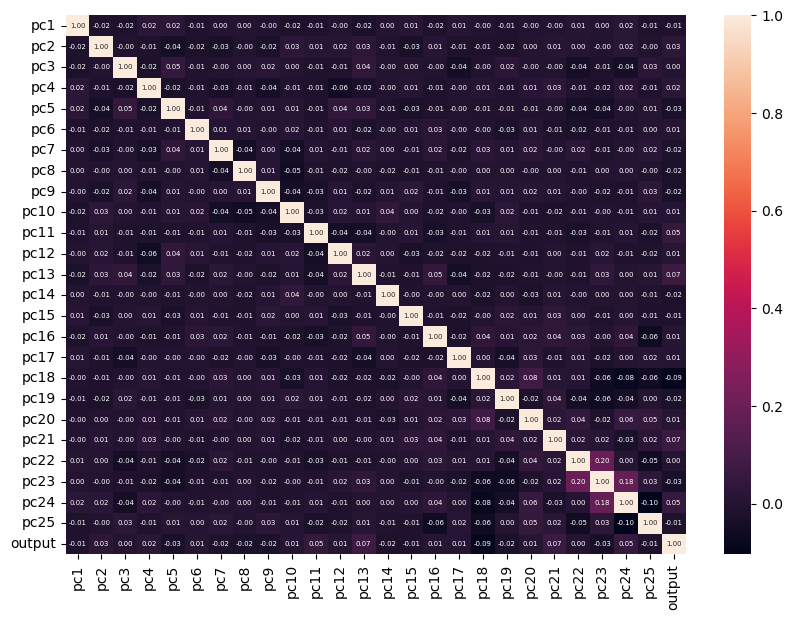

In [59]:
df_corr = pd.concat([X_train_logunder, y_train_logunder], axis=1)
corr = df_corr.corr()

plt.figure(figsize=(10,7))
ax=sns.heatmap(corr, annot=True, fmt='.2f', annot_kws={"fontsize":5})
plt.show()

From correlation table we could see that no features are correlated with each other. So we will leave the features as it is

#### Model training

In [60]:
### Model training
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_logunder, y_train_logunder)

LogisticRegression(random_state=42)

In [61]:
# predict probabilities
lr_probs = logreg.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

In [62]:
lr_auc = roc_auc_score(y_test, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.608


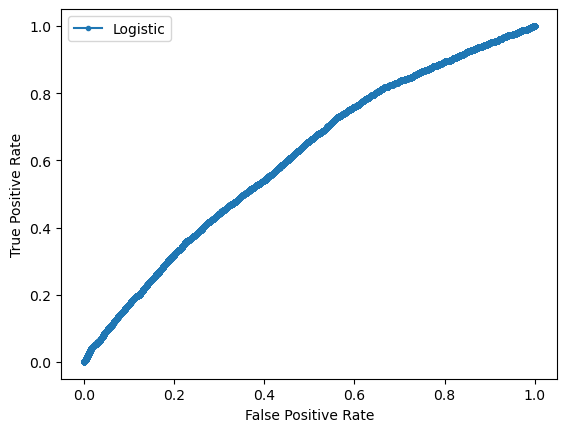

In [63]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
lr_fpr, lr_tpr, threshold = roc_curve(y_test, lr_probs)
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Logistic: auc=0.023


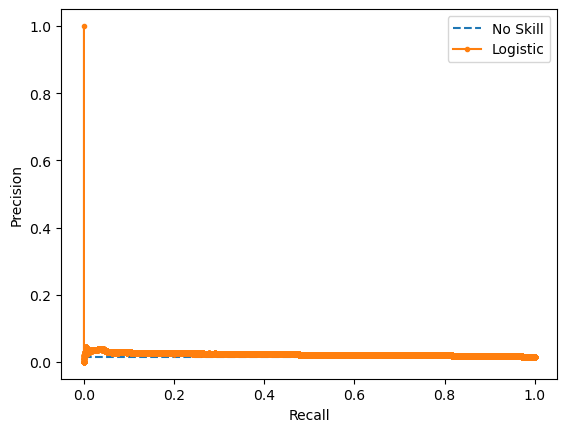

In [64]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_auc = auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: auc=%.3f' % (lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [65]:
### Confusion matrix
from sklearn.metrics import classification_report
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.58      0.73    183451
           1       0.02      0.56      0.04      2915

    accuracy                           0.58    186366
   macro avg       0.50      0.57      0.39    186366
weighted avg       0.97      0.58      0.72    186366



Since our objective is to minimize company loss, predicting the risk of client default, a good recall rate is desirable because we want to identify the maximum amount of clients that are indeed prone to stop paying their debts, thus, we are pursuing a small number of False Negatives.

Additionally, we also seek to minimize the number of False Positives because we don’t want clients to be mistakenly identified as defaulters. Therefore, a good precision rate is also desirable.

However, there is always a tradeoff between precision and recall. so, we chose to give more emphasis to recall, using it as our evaluation metric. The recall for undersampling using logistic regression is 56%

### Logistic Regression (Oversampling)

#### Split train-test data

In [66]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.25, random_state=42)

##### Check VIF

In [67]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(X_train_over)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,pc1,1.004013
2,pc2,1.007356
3,pc3,1.009704
4,pc4,1.010007
5,pc5,1.012607
6,pc6,1.005110
7,pc7,1.015375
8,pc8,1.022956
9,pc9,1.007390
10,pc10,1.024226


The multicollinearity among each features is in acceptable range (vif < 4)

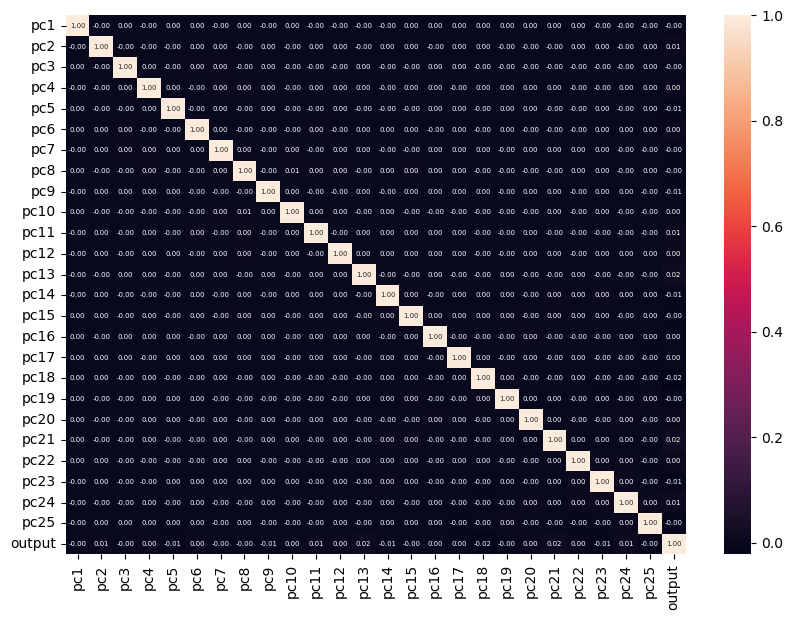

In [68]:
df_corr = pd.concat([X_train, y_train], axis=1)
corr = df_corr.corr()

plt.figure(figsize=(10,7))
ax=sns.heatmap(corr, annot=True, fmt='.2f', annot_kws={"fontsize":5})
plt.show()

From correlation table we could see that no features are correlated with each other. So we will leave the features as it is

#### Model training

In [69]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_over, y_train_over)

LogisticRegression(random_state=42)

In [70]:
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.58      0.73    183451
           1       0.02      0.57      0.04      2915

    accuracy                           0.58    186366
   macro avg       0.50      0.57      0.38    186366
weighted avg       0.97      0.58      0.72    186366



By comparing both undersampling and oversampling, we could see that the recall of oversampling is slightly higher than undersampling. But considering the computational cost and how many imaginary object that we created using oversampling so we will choose undersampling

### Modeling using Decision Tree

In [71]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_under, y_under, test_size=0.25, random_state=42)

In [72]:
# Define Random Forest Model
from sklearn.tree import DecisionTreeClassifier

rf_dt = DecisionTreeClassifier(random_state=42)

#### Hyperparameter tuning

In [73]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'max_depth':(1,2,3,4,5,6,7,8,9,10),
    'max_leaf_nodes' : (5,10,20,50,100)
}

# note: we use recall
rf_dt_randomcv = RandomizedSearchCV(rf_dt, parameters, cv=5, 
                                     scoring='recall', n_iter=10)
rf_dt_randomcv.fit(X_train_dt, y_train_dt)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'max_depth': (1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10),
                                        'max_leaf_nodes': (5, 10, 20, 50, 100)},
                   scoring='recall')

In [74]:
# the results
cv_result = pd.DataFrame(rf_dt_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
6,"{'max_leaf_nodes': 100, 'max_depth': 1}",0.774371,1
2,"{'max_leaf_nodes': 10, 'max_depth': 7}",0.671776,2
3,"{'max_leaf_nodes': 10, 'max_depth': 10}",0.671776,2
1,"{'max_leaf_nodes': 5, 'max_depth': 5}",0.657456,4
8,"{'max_leaf_nodes': 5, 'max_depth': 6}",0.657456,4
0,"{'max_leaf_nodes': 50, 'max_depth': 5}",0.651185,6
9,"{'max_leaf_nodes': 100, 'max_depth': 5}",0.651185,6
4,"{'max_leaf_nodes': 20, 'max_depth': 7}",0.636778,8
5,"{'max_leaf_nodes': 100, 'max_depth': 6}",0.624177,9
7,"{'max_leaf_nodes': 100, 'max_depth': 4}",0.615980,10


The best hyperparameter is with depth: 10 and number of trees: 80

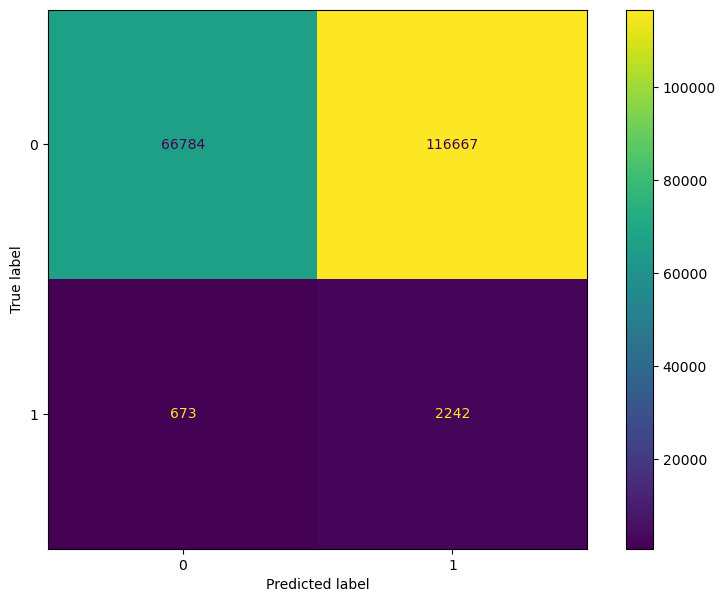

In [75]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_dt_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_dt_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_dt_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [76]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_dt_randomcv.best_estimator_.predict(X_train_dt)
print(classification_report(y_train_dt, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.36      0.45      6147
           1       0.55      0.77      0.64      6112

    accuracy                           0.57     12259
   macro avg       0.58      0.57      0.55     12259
weighted avg       0.58      0.57      0.55     12259



In [77]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_dt_randomcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.36      0.53    183451
           1       0.02      0.77      0.04      2915

    accuracy                           0.37    186366
   macro avg       0.50      0.57      0.28    186366
weighted avg       0.97      0.37      0.52    186366



### Modeling using Random Forest

In [78]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_under, y_under, test_size=0.25, random_state=42)

In [79]:
# Define Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

#### Hyperparameter tuning

In [80]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50,60,70,80,90,100),
    'max_depth': (1,2,3,4,5,6,7,8,9,10)
}

# note: we use recall
rf_clf_randomcv = RandomizedSearchCV(rf_clf, parameters, cv=5, 
                                     scoring='recall', n_iter=10)
rf_clf_randomcv.fit(X_train_rf, y_train_rf)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': (1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10),
                                        'n_estimators': (10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100)},
                   scoring='recall')

In [81]:
# the results
cv_result = pd.DataFrame(rf_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
4,"{'n_estimators': 50, 'max_depth': 10}",0.776501,1
0,"{'n_estimators': 30, 'max_depth': 9}",0.766196,2
2,"{'n_estimators': 30, 'max_depth': 8}",0.742141,3
9,"{'n_estimators': 50, 'max_depth': 7}",0.739197,4
5,"{'n_estimators': 40, 'max_depth': 2}",0.726435,5
7,"{'n_estimators': 50, 'max_depth': 2}",0.724637,6
8,"{'n_estimators': 60, 'max_depth': 5}",0.722836,7
1,"{'n_estimators': 40, 'max_depth': 6}",0.719891,8
3,"{'n_estimators': 10, 'max_depth': 5}",0.693061,9
6,"{'n_estimators': 30, 'max_depth': 1}",0.661319,10


The best hyperparameter is with depth: 10 and number of trees: 80

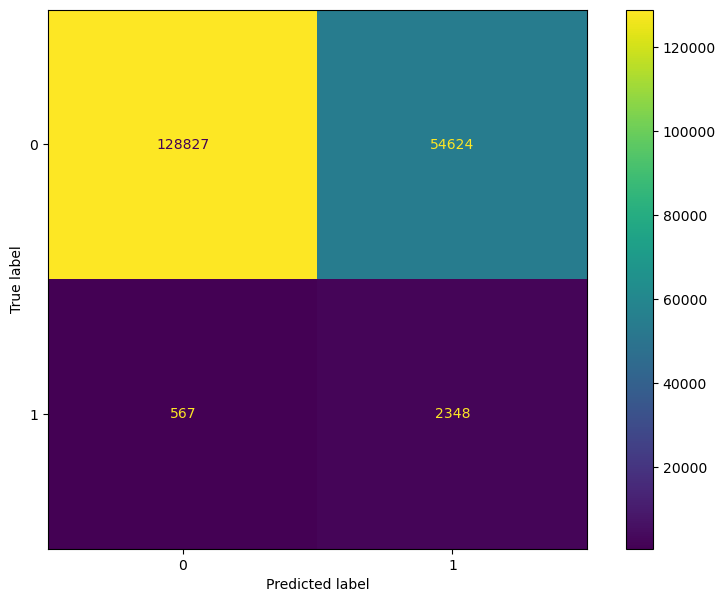

In [82]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [83]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_randomcv.best_estimator_.predict(X_train_rf)
print(classification_report(y_train_rf, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      6147
           1       0.84      0.90      0.87      6112

    accuracy                           0.87     12259
   macro avg       0.87      0.87      0.87     12259
weighted avg       0.87      0.87      0.87     12259



In [84]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82    183451
           1       0.04      0.81      0.08      2915

    accuracy                           0.70    186366
   macro avg       0.52      0.75      0.45    186366
weighted avg       0.98      0.70      0.81    186366



### Modeling using SVC

In [85]:
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X_under, y_under, test_size=0.25, random_state=42)

In [86]:
from sklearn.svm import SVC

svc_clf = SVC()
# svc_best = SVC(kernel='sigmoid',C=0.30430932158451696, degree=3,
#                gamma=1.9411547934320157, max_iter=1000)
# svc_best.fit(X_train_svc,y_train_svc)
# y_pred_train_sc = svc_best.predict(X_train_svc)
# y_pred_svc = svc_best.predict(X_test)

#### Hyperparameter tuning

In [87]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'C': (0.1,0.5,1,5,10,50,100,1000),
    'kernel':('linear', 'poly', 'rbf', 'sigmoid')
}

# now we use recall (sensitivity) as metric
svc_clf_rcv = RandomizedSearchCV(svc_clf, parameters, cv=5, scoring='recall')
svc_clf_rcv.fit(X_train_svc, y_train_svc)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': (0.1, 0.5, 1, 5, 10, 50, 100,
                                              1000),
                                        'kernel': ('linear', 'poly', 'rbf',
                                                   'sigmoid')},
                   scoring='recall')

In [88]:
# the compact results
cv_result = pd.DataFrame(svc_clf_rcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
5,"{'kernel': 'rbf', 'C': 1000}",0.748685,1
7,"{'kernel': 'poly', 'C': 1000}",0.715473,2
9,"{'kernel': 'linear', 'C': 5}",0.697810,3
6,"{'kernel': 'linear', 'C': 1}",0.697647,4
8,"{'kernel': 'rbf', 'C': 10}",0.670809,5
2,"{'kernel': 'rbf', 'C': 5}",0.650033,6
1,"{'kernel': 'poly', 'C': 5}",0.571499,7
4,"{'kernel': 'sigmoid', 'C': 50}",0.509160,8
3,"{'kernel': 'poly', 'C': 1}",0.443227,9
0,"{'kernel': 'poly', 'C': 0.5}",0.372054,10


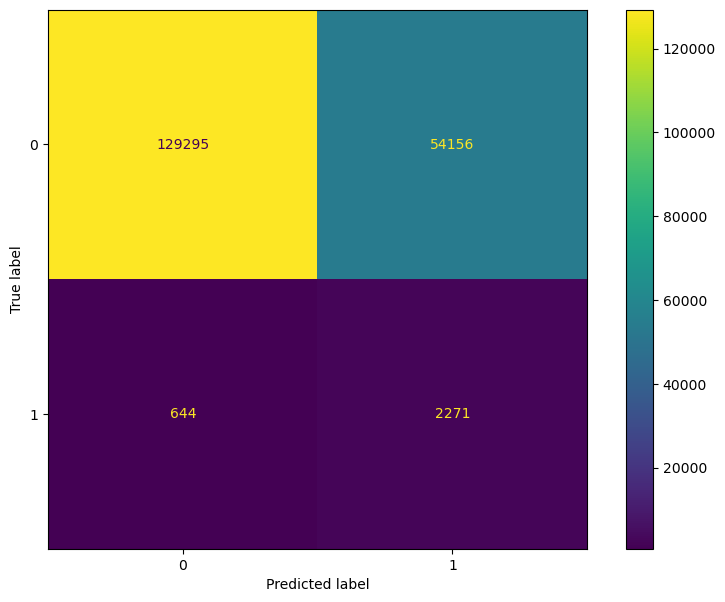

In [89]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = svc_clf_rcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=svc_clf_rcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=svc_clf_rcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [90]:
# classification report
from sklearn.metrics import classification_report
y_pred = svc_clf_rcv.best_estimator_.predict(X_train_svc)
print(classification_report(y_train_svc, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      6147
           1       0.82      0.84      0.83      6112

    accuracy                           0.83     12259
   macro avg       0.83      0.83      0.83     12259
weighted avg       0.83      0.83      0.83     12259



In [91]:
# classification report
from sklearn.metrics import classification_report
y_pred = svc_clf_rcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.83    183451
           1       0.04      0.78      0.08      2915

    accuracy                           0.71    186366
   macro avg       0.52      0.74      0.45    186366
weighted avg       0.98      0.71      0.81    186366



In [92]:
# print("Recall using SVC  on train Data : {:.2f} %".format(np.round(recall_score(y_train_svc, y_pred_train_sc),4)*100))
# print("Recall using SVC  on test Data : {:.2f} %".format(np.round(recall_score(y_test, y_pred_svc),4)*100))

### Modeling using KNN

In [93]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_under, y_under, test_size=0.25, random_state=42)

In [94]:
# define the estimator/model
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

#### Hyperparameter tuning

In [95]:
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8),
    'weights':('uniform','distance')
}

# now we use recall (sensitivity) as metric
knn_clf_rcv = RandomizedSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_rcv.fit(X_train_knn, y_train_knn)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': (2, 3, 4, 5, 6, 7, 8),
                                        'weights': ('uniform', 'distance')},
                   scoring='recall')

In [96]:
# the compact results
cv_result = pd.DataFrame(knn_clf_rcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
7,"{'weights': 'distance', 'n_neighbors': 7}",0.844237,1
3,"{'weights': 'distance', 'n_neighbors': 5}",0.843911,2
5,"{'weights': 'distance', 'n_neighbors': 6}",0.842111,3
2,"{'weights': 'distance', 'n_neighbors': 3}",0.842111,4
4,"{'weights': 'distance', 'n_neighbors': 2}",0.827715,5
8,"{'weights': 'uniform', 'n_neighbors': 3}",0.797115,6
0,"{'weights': 'uniform', 'n_neighbors': 4}",0.696821,7
9,"{'weights': 'uniform', 'n_neighbors': 6}",0.691751,8
1,"{'weights': 'uniform', 'n_neighbors': 2}",0.685859,9
6,"{'weights': 'uniform', 'n_neighbors': 8}",0.683245,10


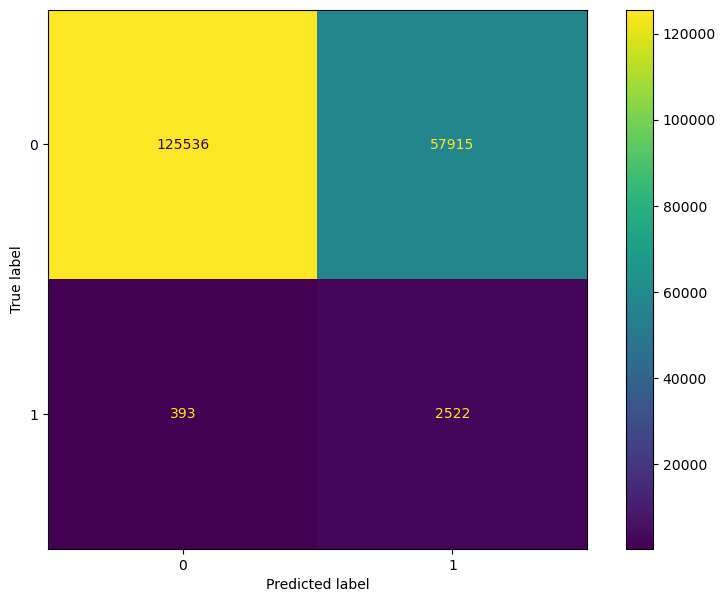

In [97]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = knn_clf_rcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_rcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_rcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [98]:
# classification report
from sklearn.metrics import classification_report
y_pred = knn_clf_rcv.best_estimator_.predict(X_train_knn)
print(classification_report(y_train_knn, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6147
           1       1.00      0.99      0.99      6112

    accuracy                           0.99     12259
   macro avg       0.99      0.99      0.99     12259
weighted avg       0.99      0.99      0.99     12259



In [99]:
# classification report
from sklearn.metrics import classification_report
y_pred = knn_clf_rcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81    183451
           1       0.04      0.87      0.08      2915

    accuracy                           0.69    186366
   macro avg       0.52      0.77      0.45    186366
weighted avg       0.98      0.69      0.80    186366



### Modeling using Neural Network

In [100]:
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_under, y_under, test_size=0.25, random_state=42)

In [101]:
# Set the input and output sizes
input_size = 25
output_size = 1
hidden_layer_size = 5
    
 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu', input_dim = input_size), 
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),     
    tf.keras.layers.Dense(output_size, activation='sigmoid')
])
 
 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])
 
batch_size = 50
max_epochs = 500
early_stopping = tf.keras.callbacks.EarlyStopping(patience=0.2)
 
history=model.fit(X_train_ann, y_train_ann, 
          batch_size=batch_size,
          epochs=max_epochs,
          validation_split=0.2,
          verbose = 2, 
          )  

Epoch 1/500
197/197 - 1s - loss: 0.7360 - recall: 0.7871 - val_loss: 0.6910 - val_recall: 0.6008 - 1s/epoch - 6ms/step
Epoch 2/500
197/197 - 0s - loss: 0.6918 - recall: 0.5473 - val_loss: 0.6847 - val_recall: 0.4879 - 237ms/epoch - 1ms/step
Epoch 3/500
197/197 - 0s - loss: 0.6855 - recall: 0.5038 - val_loss: 0.6829 - val_recall: 0.5054 - 242ms/epoch - 1ms/step
Epoch 4/500
197/197 - 0s - loss: 0.6824 - recall: 0.4960 - val_loss: 0.6822 - val_recall: 0.5506 - 234ms/epoch - 1ms/step
Epoch 5/500
197/197 - 0s - loss: 0.6805 - recall: 0.5355 - val_loss: 0.6812 - val_recall: 0.5356 - 223ms/epoch - 1ms/step
Epoch 6/500
197/197 - 0s - loss: 0.6788 - recall: 0.5544 - val_loss: 0.6807 - val_recall: 0.5464 - 221ms/epoch - 1ms/step
Epoch 7/500
197/197 - 0s - loss: 0.6772 - recall: 0.5377 - val_loss: 0.6789 - val_recall: 0.5071 - 218ms/epoch - 1ms/step
Epoch 8/500
197/197 - 0s - loss: 0.6755 - recall: 0.5243 - val_loss: 0.6797 - val_recall: 0.5749 - 241ms/epoch - 1ms/step
Epoch 9/500
197/197 - 1s - 

Epoch 68/500
197/197 - 0s - loss: 0.6513 - recall: 0.6264 - val_loss: 0.6685 - val_recall: 0.5975 - 209ms/epoch - 1ms/step
Epoch 69/500
197/197 - 0s - loss: 0.6514 - recall: 0.6246 - val_loss: 0.6692 - val_recall: 0.6226 - 216ms/epoch - 1ms/step
Epoch 70/500
197/197 - 0s - loss: 0.6511 - recall: 0.6349 - val_loss: 0.6702 - val_recall: 0.6142 - 210ms/epoch - 1ms/step
Epoch 71/500
197/197 - 0s - loss: 0.6512 - recall: 0.6311 - val_loss: 0.6689 - val_recall: 0.6084 - 200ms/epoch - 1ms/step
Epoch 72/500
197/197 - 0s - loss: 0.6510 - recall: 0.6264 - val_loss: 0.6692 - val_recall: 0.6159 - 200ms/epoch - 1ms/step
Epoch 73/500
197/197 - 1s - loss: 0.6511 - recall: 0.6274 - val_loss: 0.6693 - val_recall: 0.6201 - 872ms/epoch - 4ms/step
Epoch 74/500
197/197 - 2s - loss: 0.6509 - recall: 0.6378 - val_loss: 0.6682 - val_recall: 0.5808 - 2s/epoch - 8ms/step
Epoch 75/500
197/197 - 0s - loss: 0.6506 - recall: 0.6211 - val_loss: 0.6716 - val_recall: 0.6586 - 223ms/epoch - 1ms/step
Epoch 76/500
197/19

Epoch 134/500
197/197 - 0s - loss: 0.6479 - recall: 0.6396 - val_loss: 0.6704 - val_recall: 0.6301 - 200ms/epoch - 1ms/step
Epoch 135/500
197/197 - 0s - loss: 0.6479 - recall: 0.6327 - val_loss: 0.6701 - val_recall: 0.6368 - 198ms/epoch - 1ms/step
Epoch 136/500
197/197 - 0s - loss: 0.6480 - recall: 0.6530 - val_loss: 0.6694 - val_recall: 0.6025 - 201ms/epoch - 1ms/step
Epoch 137/500
197/197 - 0s - loss: 0.6481 - recall: 0.6362 - val_loss: 0.6694 - val_recall: 0.6167 - 201ms/epoch - 1ms/step
Epoch 138/500
197/197 - 0s - loss: 0.6478 - recall: 0.6471 - val_loss: 0.6701 - val_recall: 0.6100 - 203ms/epoch - 1ms/step
Epoch 139/500
197/197 - 0s - loss: 0.6478 - recall: 0.6402 - val_loss: 0.6708 - val_recall: 0.6452 - 214ms/epoch - 1ms/step
Epoch 140/500
197/197 - 0s - loss: 0.6478 - recall: 0.6506 - val_loss: 0.6679 - val_recall: 0.6017 - 208ms/epoch - 1ms/step
Epoch 141/500
197/197 - 0s - loss: 0.6479 - recall: 0.6406 - val_loss: 0.6688 - val_recall: 0.5724 - 203ms/epoch - 1ms/step
Epoch 14

Epoch 200/500
197/197 - 0s - loss: 0.6456 - recall: 0.6419 - val_loss: 0.6692 - val_recall: 0.6435 - 183ms/epoch - 930us/step
Epoch 201/500
197/197 - 0s - loss: 0.6458 - recall: 0.6512 - val_loss: 0.6691 - val_recall: 0.6444 - 208ms/epoch - 1ms/step
Epoch 202/500
197/197 - 0s - loss: 0.6458 - recall: 0.6583 - val_loss: 0.6677 - val_recall: 0.5958 - 213ms/epoch - 1ms/step
Epoch 203/500
197/197 - 0s - loss: 0.6458 - recall: 0.6463 - val_loss: 0.6679 - val_recall: 0.6092 - 220ms/epoch - 1ms/step
Epoch 204/500
197/197 - 0s - loss: 0.6457 - recall: 0.6593 - val_loss: 0.6674 - val_recall: 0.6159 - 188ms/epoch - 952us/step
Epoch 205/500
197/197 - 0s - loss: 0.6452 - recall: 0.6453 - val_loss: 0.6700 - val_recall: 0.6142 - 194ms/epoch - 987us/step
Epoch 206/500
197/197 - 0s - loss: 0.6456 - recall: 0.6504 - val_loss: 0.6678 - val_recall: 0.6293 - 190ms/epoch - 966us/step
Epoch 207/500
197/197 - 0s - loss: 0.6455 - recall: 0.6530 - val_loss: 0.6679 - val_recall: 0.6067 - 212ms/epoch - 1ms/step


Epoch 266/500
197/197 - 0s - loss: 0.6430 - recall: 0.6640 - val_loss: 0.6676 - val_recall: 0.6427 - 189ms/epoch - 960us/step
Epoch 267/500
197/197 - 0s - loss: 0.6430 - recall: 0.6606 - val_loss: 0.6673 - val_recall: 0.6586 - 203ms/epoch - 1ms/step
Epoch 268/500
197/197 - 0s - loss: 0.6429 - recall: 0.6612 - val_loss: 0.6669 - val_recall: 0.6201 - 190ms/epoch - 965us/step
Epoch 269/500
197/197 - 0s - loss: 0.6433 - recall: 0.6652 - val_loss: 0.6666 - val_recall: 0.6151 - 186ms/epoch - 942us/step
Epoch 270/500
197/197 - 0s - loss: 0.6429 - recall: 0.6614 - val_loss: 0.6668 - val_recall: 0.6184 - 186ms/epoch - 944us/step
Epoch 271/500
197/197 - 0s - loss: 0.6429 - recall: 0.6555 - val_loss: 0.6676 - val_recall: 0.6218 - 193ms/epoch - 979us/step
Epoch 272/500
197/197 - 0s - loss: 0.6427 - recall: 0.6553 - val_loss: 0.6689 - val_recall: 0.6695 - 183ms/epoch - 930us/step
Epoch 273/500
197/197 - 0s - loss: 0.6428 - recall: 0.6648 - val_loss: 0.6673 - val_recall: 0.5925 - 193ms/epoch - 982us

Epoch 332/500
197/197 - 0s - loss: 0.6425 - recall: 0.6691 - val_loss: 0.6682 - val_recall: 0.6092 - 186ms/epoch - 946us/step
Epoch 333/500
197/197 - 0s - loss: 0.6419 - recall: 0.6677 - val_loss: 0.6688 - val_recall: 0.5782 - 187ms/epoch - 947us/step
Epoch 334/500
197/197 - 0s - loss: 0.6419 - recall: 0.6551 - val_loss: 0.6673 - val_recall: 0.6109 - 187ms/epoch - 951us/step
Epoch 335/500
197/197 - 0s - loss: 0.6417 - recall: 0.6718 - val_loss: 0.6687 - val_recall: 0.6050 - 190ms/epoch - 966us/step
Epoch 336/500
197/197 - 0s - loss: 0.6421 - recall: 0.6583 - val_loss: 0.6687 - val_recall: 0.6192 - 191ms/epoch - 972us/step
Epoch 337/500
197/197 - 0s - loss: 0.6417 - recall: 0.6783 - val_loss: 0.6684 - val_recall: 0.6218 - 193ms/epoch - 980us/step
Epoch 338/500
197/197 - 0s - loss: 0.6422 - recall: 0.6650 - val_loss: 0.6680 - val_recall: 0.6285 - 192ms/epoch - 975us/step
Epoch 339/500
197/197 - 0s - loss: 0.6419 - recall: 0.6598 - val_loss: 0.6706 - val_recall: 0.6653 - 185ms/epoch - 937

Epoch 398/500
197/197 - 0s - loss: 0.6413 - recall: 0.6677 - val_loss: 0.6712 - val_recall: 0.6510 - 204ms/epoch - 1ms/step
Epoch 399/500
197/197 - 0s - loss: 0.6414 - recall: 0.6734 - val_loss: 0.6701 - val_recall: 0.5900 - 198ms/epoch - 1ms/step
Epoch 400/500
197/197 - 0s - loss: 0.6410 - recall: 0.6579 - val_loss: 0.6700 - val_recall: 0.6184 - 190ms/epoch - 966us/step
Epoch 401/500
197/197 - 0s - loss: 0.6409 - recall: 0.6602 - val_loss: 0.6719 - val_recall: 0.6628 - 192ms/epoch - 976us/step
Epoch 402/500
197/197 - 0s - loss: 0.6413 - recall: 0.6697 - val_loss: 0.6711 - val_recall: 0.6285 - 186ms/epoch - 945us/step
Epoch 403/500
197/197 - 0s - loss: 0.6412 - recall: 0.6646 - val_loss: 0.6702 - val_recall: 0.6310 - 191ms/epoch - 970us/step
Epoch 404/500
197/197 - 0s - loss: 0.6412 - recall: 0.6563 - val_loss: 0.6708 - val_recall: 0.6444 - 188ms/epoch - 955us/step
Epoch 405/500
197/197 - 0s - loss: 0.6414 - recall: 0.6679 - val_loss: 0.6709 - val_recall: 0.6360 - 188ms/epoch - 957us/s

Epoch 464/500
197/197 - 0s - loss: 0.6408 - recall: 0.6673 - val_loss: 0.6711 - val_recall: 0.6377 - 187ms/epoch - 949us/step
Epoch 465/500
197/197 - 0s - loss: 0.6406 - recall: 0.6654 - val_loss: 0.6717 - val_recall: 0.6151 - 189ms/epoch - 960us/step
Epoch 466/500
197/197 - 0s - loss: 0.6406 - recall: 0.6663 - val_loss: 0.6716 - val_recall: 0.6276 - 191ms/epoch - 972us/step
Epoch 467/500
197/197 - 0s - loss: 0.6408 - recall: 0.6656 - val_loss: 0.6706 - val_recall: 0.6159 - 192ms/epoch - 973us/step
Epoch 468/500
197/197 - 0s - loss: 0.6406 - recall: 0.6665 - val_loss: 0.6713 - val_recall: 0.6276 - 186ms/epoch - 945us/step
Epoch 469/500
197/197 - 0s - loss: 0.6410 - recall: 0.6626 - val_loss: 0.6707 - val_recall: 0.6192 - 236ms/epoch - 1ms/step
Epoch 470/500
197/197 - 0s - loss: 0.6405 - recall: 0.6644 - val_loss: 0.6697 - val_recall: 0.6444 - 211ms/epoch - 1ms/step
Epoch 471/500
197/197 - 0s - loss: 0.6405 - recall: 0.6648 - val_loss: 0.6719 - val_recall: 0.6017 - 206ms/epoch - 1ms/ste

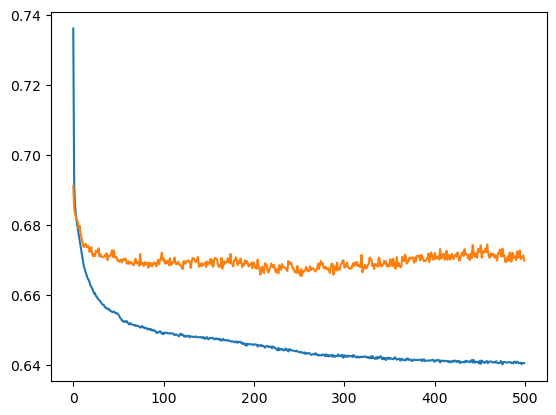

In [102]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();
history_df['val_loss'].plot();

In [103]:
test_loss, recall = model.evaluate(X_test, y_test)
print('recall: ', recall)

5824/5824 [==============================] - 4s 661us/step - loss: 0.6632 - recall: 0.6446
recall:  0.6445969343185425


### Conclusion

After We did all of the step above. We can conclude some points

1.   Most clients work as laborer, have education of secondary special, and don't have any children. We should paid extra caution to these clients
2.   The higher the family member count, the higher the risk of client to be considered 'bad client'. It kinda make sense because the higher the family member count they need more money to maintain their family so the risk of them considered as 'bad custome' is higher
3.   Compared with other education level, lower secondary education has higher risk of becoming 'bad client' with 2.19% of them are bad client so we should pay more attention to client with this education level.
4.   client who is single or lives in office apartment has highest risk compared with others which is around 2.25% of the are bad client
5.   From the annual income, we can see that higher income doesn't mean that the client automatically considered as good client. Pensioner has highest annual income but the risk of becoming bad client is highest compared to the others. In term of housing type, House housing type has lower annual income but the the rate of bad client is the lowest among other housing type.
6.   From vintage analysis, the cumulative % of bad clients is increasing rapidly around ongoing month 0-15, after that the cummulative % decrease steadily




